# Customer Churn

### GOAL: Create a model to predict whether or not a customer will Churn 

Each row of a dataset represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

This machine learning project aims to correctly predict Telco users who will churn or not based on their demograhpics and telco related activties.

This is a binary classification project.

## Import Packages

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import plot_tree
from joblib import dump, load

## Quick Data Check

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
for column in df:
    try:
        unique_vals = np.unique(df[column])
    except:
        unique_vals = df[column].unique()
        
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for {}: {} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for {}: {}'.format(column, nr_values))

The number of values for customerID: 7043
The number of values for gender: 2 -- ['Female' 'Male']
The number of values for SeniorCitizen: 2 -- [0 1]
The number of values for Partner: 2 -- ['No' 'Yes']
The number of values for Dependents: 2 -- ['No' 'Yes']
The number of values for tenure: 73
The number of values for PhoneService: 2 -- ['No' 'Yes']
The number of values for MultipleLines: 3 -- ['No' 'No phone service' 'Yes']
The number of values for InternetService: 3 -- ['DSL' 'Fiber optic' 'No']
The number of values for OnlineSecurity: 3 -- ['No' 'No internet service' 'Yes']
The number of values for OnlineBackup: 3 -- ['No' 'No internet service' 'Yes']
The number of values for DeviceProtection: 3 -- ['No' 'No internet service' 'Yes']
The number of values for TechSupport: 3 -- ['No' 'No internet service' 'Yes']
The number of values for StreamingTV: 3 -- ['No' 'No internet service' 'Yes']
The number of values for StreamingMovies: 3 -- ['No' 'No internet service' 'Yes']
The number of value

- TotalCharges column has Dtype object, not float and it should be changed. 
- For many categorical columns, there are same values that are word differently.

In [6]:
df.loc[df['MultipleLines'] == 'No phone service', 'MultipleLines'] = 'No'
df.loc[df['OnlineSecurity'] == 'No internet service', 'OnlineSecurity'] = 'No'
df.loc[df['OnlineBackup'] == 'No internet service', 'OnlineBackup'] = 'No'
df.loc[df['DeviceProtection'] == 'No internet service', 'DeviceProtection'] = 'No'
df.loc[df['TechSupport'] == 'No internet service', 'TechSupport'] = 'No'
df.loc[df['StreamingTV'] == 'No internet service', 'StreamingTV'] = 'No'
df.loc[df['StreamingMovies'] == 'No internet service', 'StreamingMovies'] = 'No'

In [7]:
df.loc[df['TotalCharges'] == " ", 'TotalCharges'] = '0'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe().drop('SeniorCitizen', axis=1)

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

In [10]:
df.duplicated().sum()

0

- Many columns are categorical, meaning we will eventually need to convert them to dummy variables.  
- There is no nun-values in the dataframe and no duplicates.

## Exploratory Data Analysis

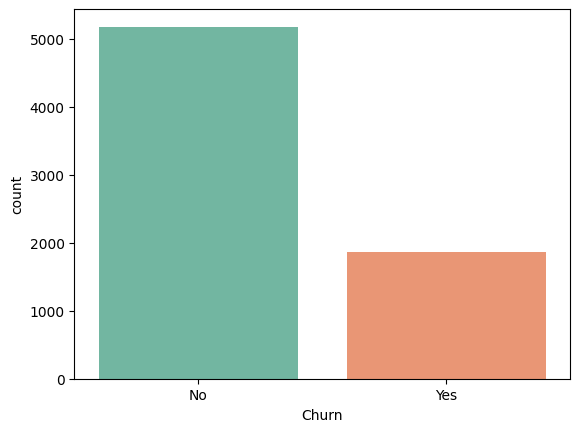

In [11]:
sns.countplot(data=df, x='Churn', palette='Set2');

In [12]:
yes_precent = round(len(df[df['Churn'] == 'Yes'])/len(df)*100,2)
no_precent = round(len(df[df['Churn'] == 'No'])/len(df)*100,2)
print('Churn:', yes_precent, '%')
print('No Churn:', no_precent, '%')

Churn: 26.54 %
No Churn: 73.46 %


**Imabalanced dataset**: might need to perform some oversampling.

### Distrbution of TotalCharges between Churn categories

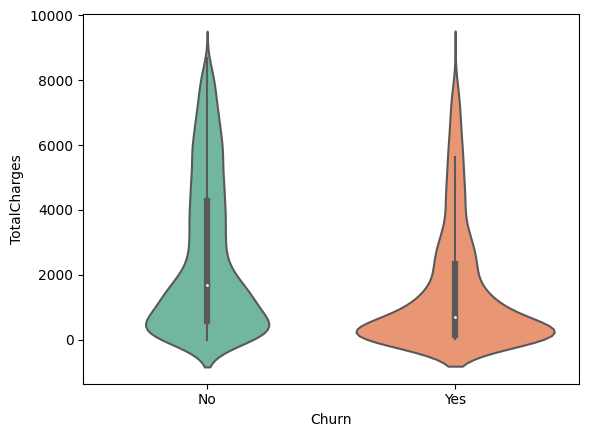

In [13]:
sns.violinplot(data=df, x='Churn', y='TotalCharges', palette='Set2');

### Distribution of TotalCharges per Contract type

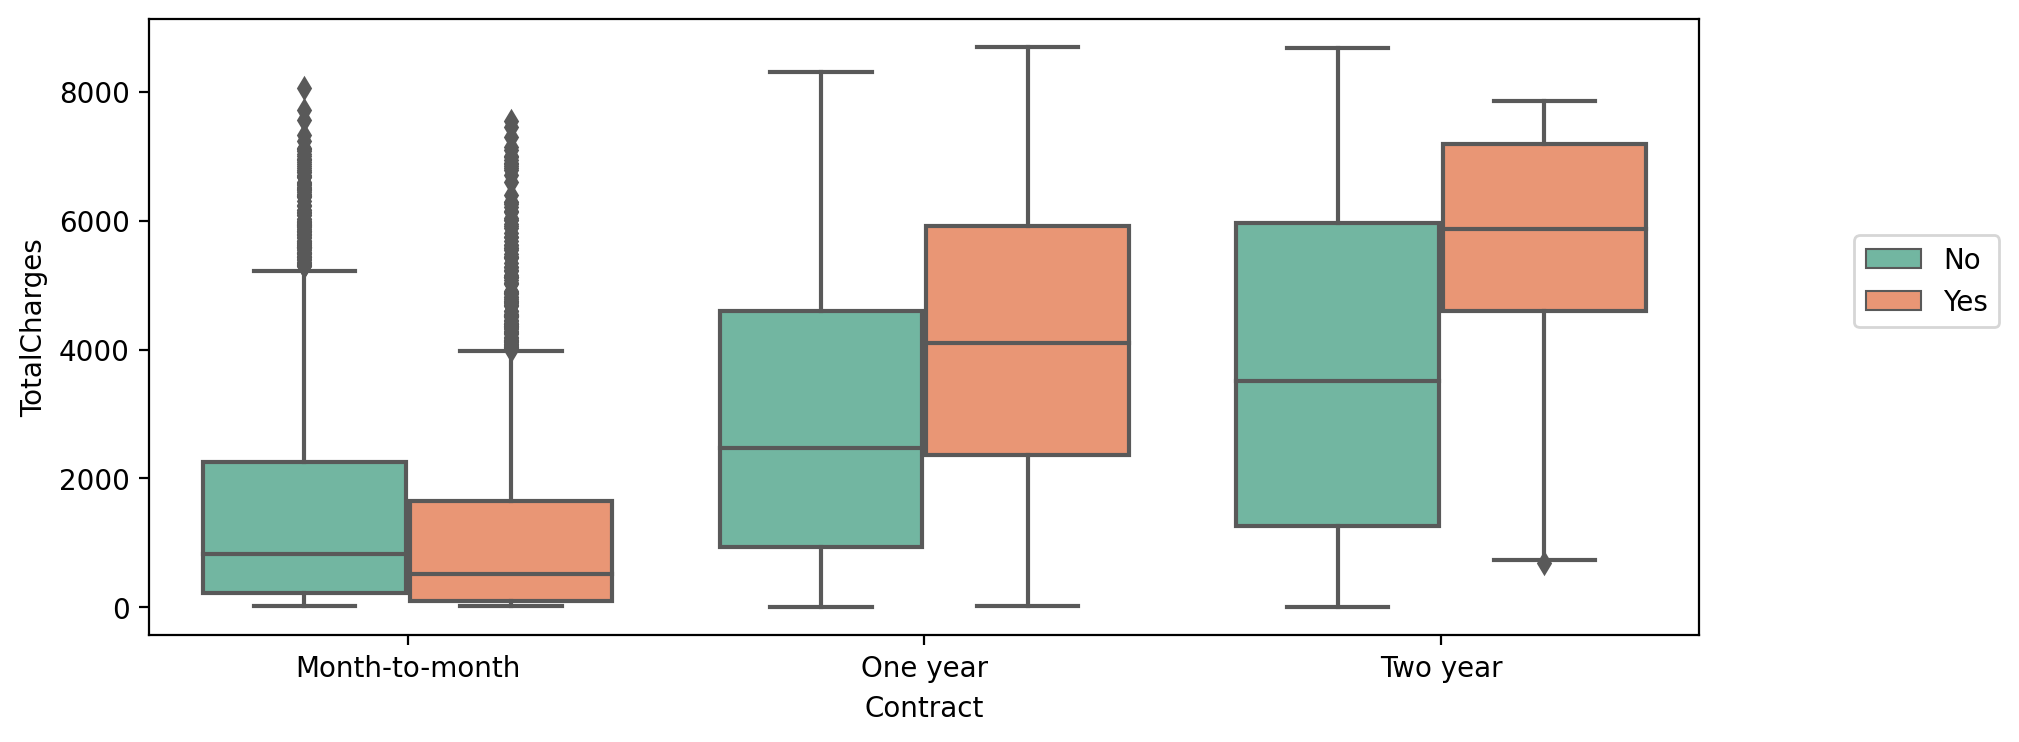

In [14]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn', palette='Set2')
plt.legend(loc=(1.1,0.5));

**Customers who churned tend to have paid more total charges and it is especially noticeable for customers who had one or two-year contracts.**

### Feature Correlation to Yes Churn

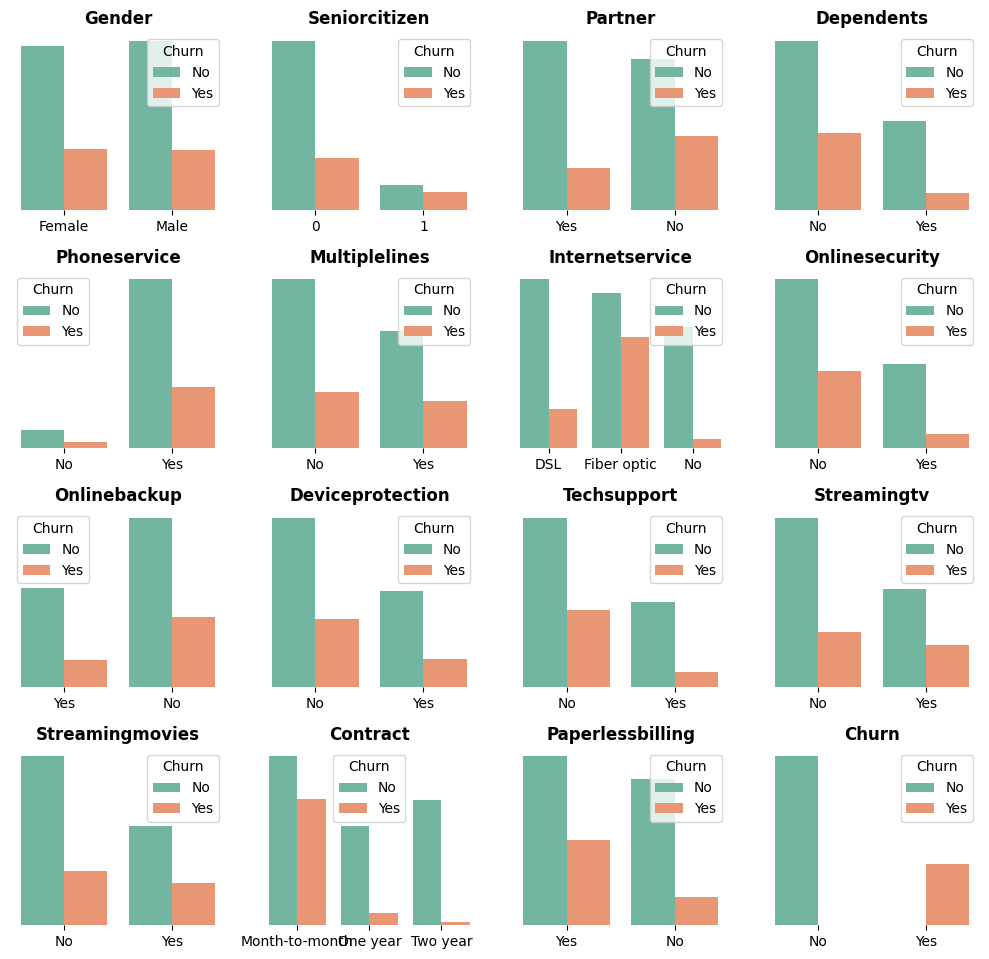

In [15]:
categories = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
              'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
              'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'Churn']

plt.figure(figsize=(10,50))
for n,column in enumerate(categories):
    plot=plt.subplot(21,4,n+1)
    sns.countplot(x=df[column],data=df,hue='Churn', palette='Set2')
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()
plt.show()

In [16]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

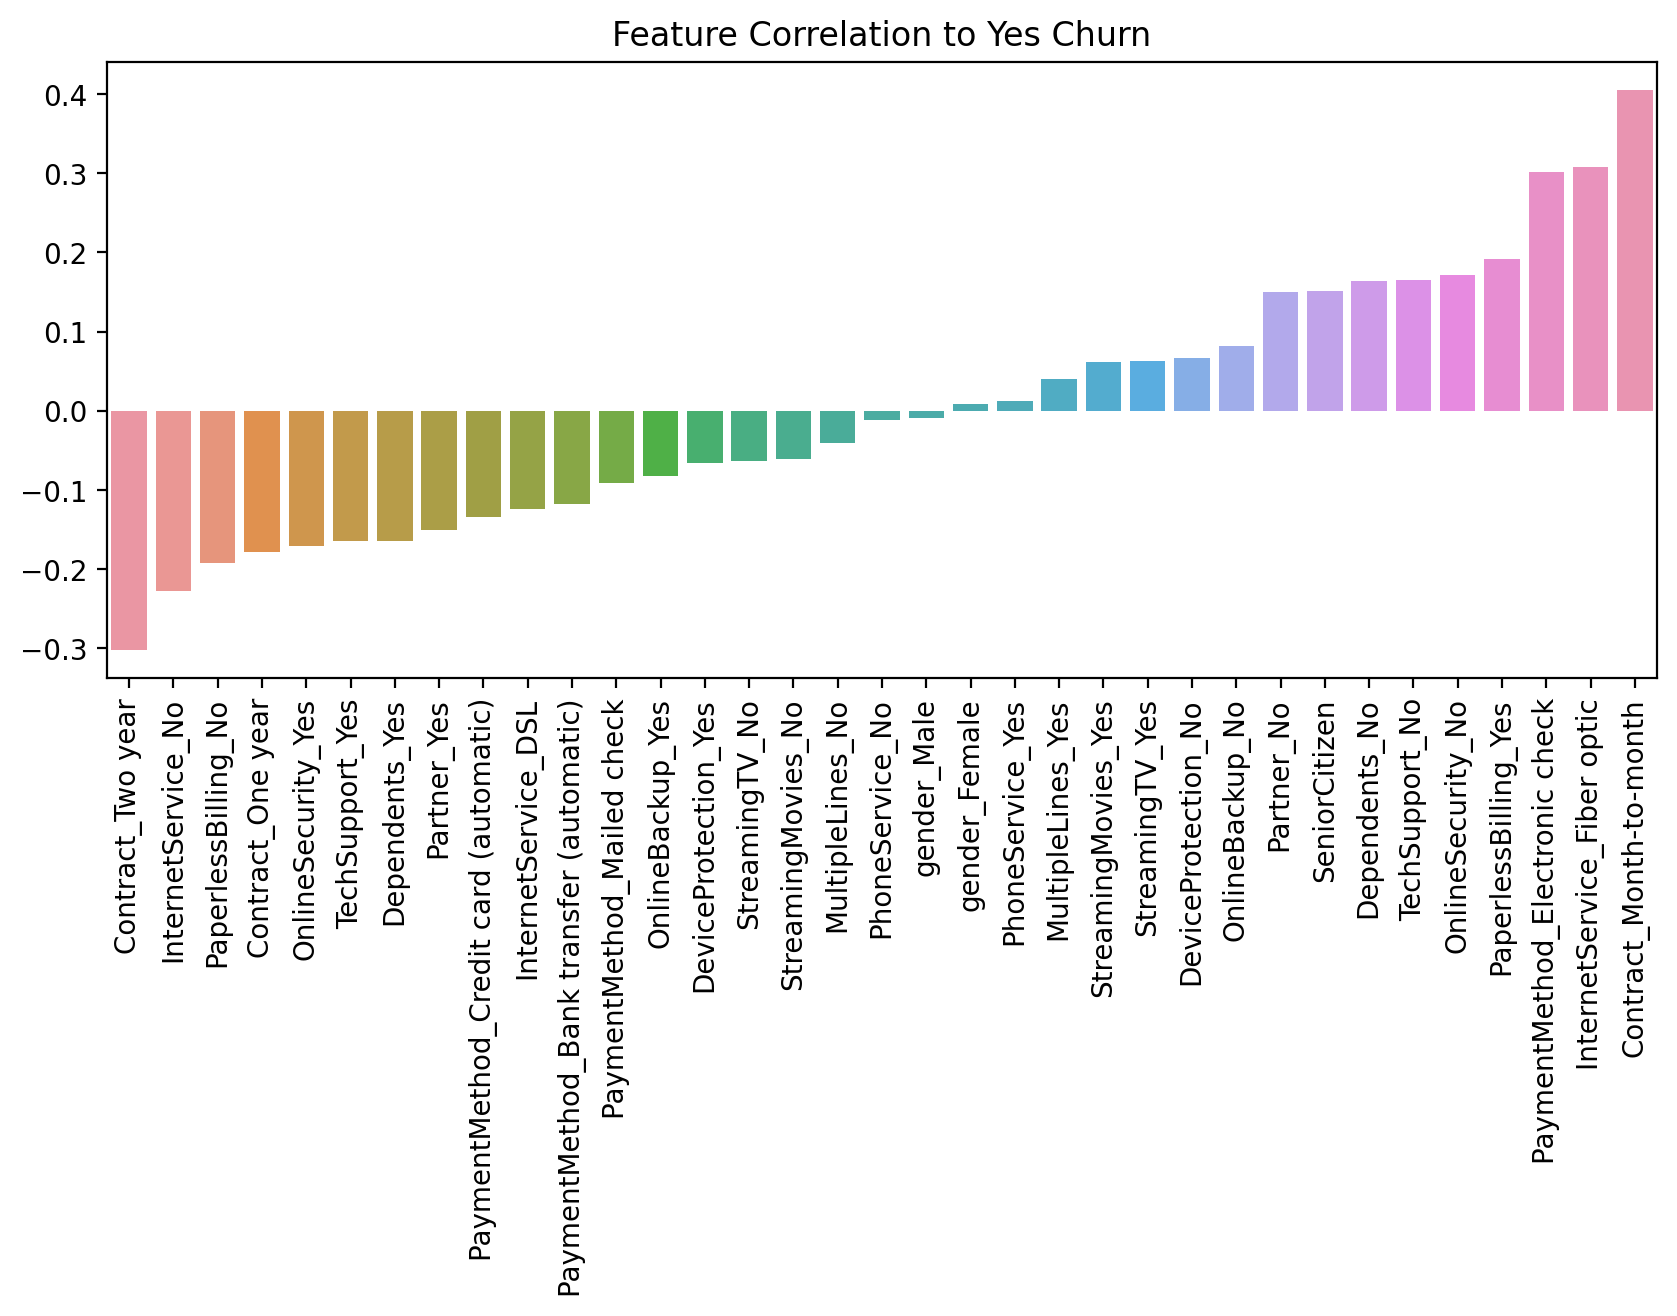

In [17]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

**Higher churn rate for customers under Month-to-Month Contract, using Fiber optic, with no Tech Support, no Online Security. Most customers are not Senior Citizens.**

## Churn Analysis

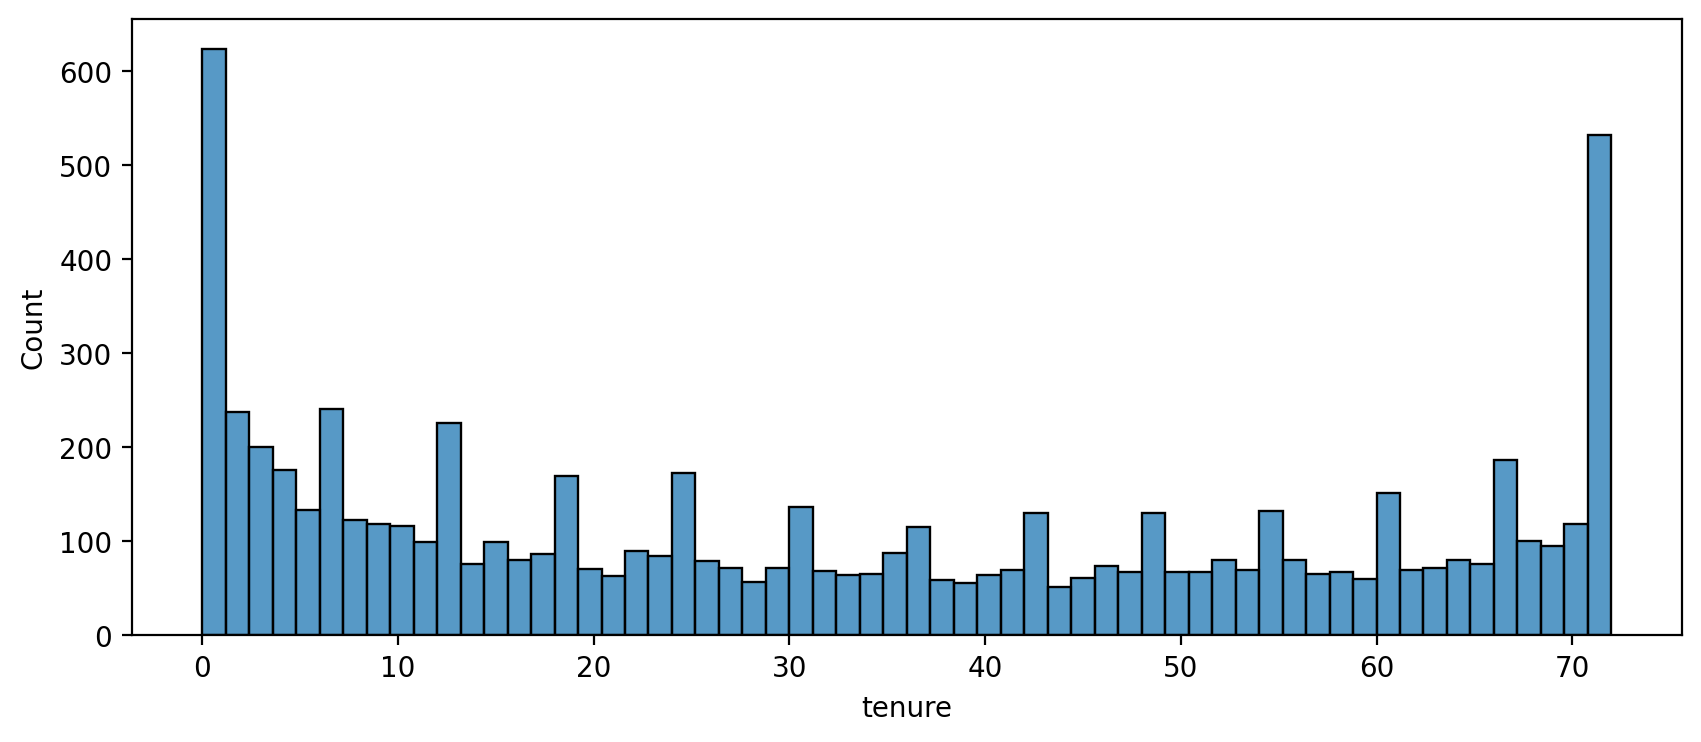

In [18]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='tenure',bins=60);

A histogram displays the distribution of "tenure" column, which is the number of months a customer was or has been on a service.

<Figure size 2400x1200 with 0 Axes>

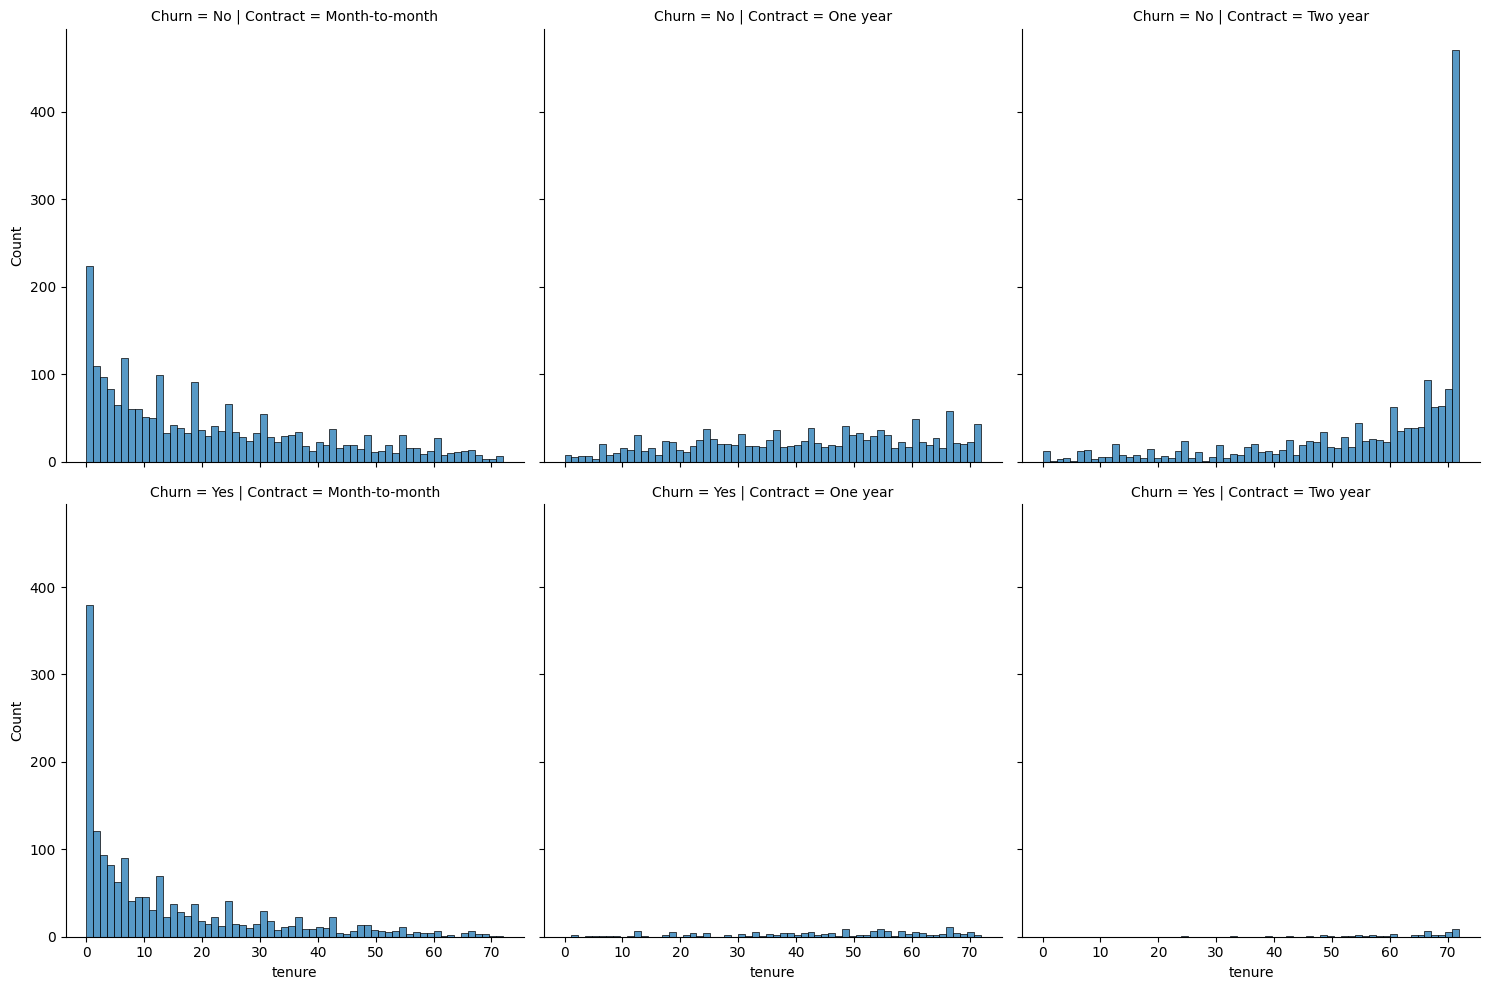

In [19]:
plt.figure(figsize=(12,6), dpi=200)
sns.displot(data=df, x='tenure', bins=60, col='Contract', row='Churn');

**Customers who are on Month-to-Month Contract are more likely to churn. The shorter the tenure, the more likely the cusomer will churn.**

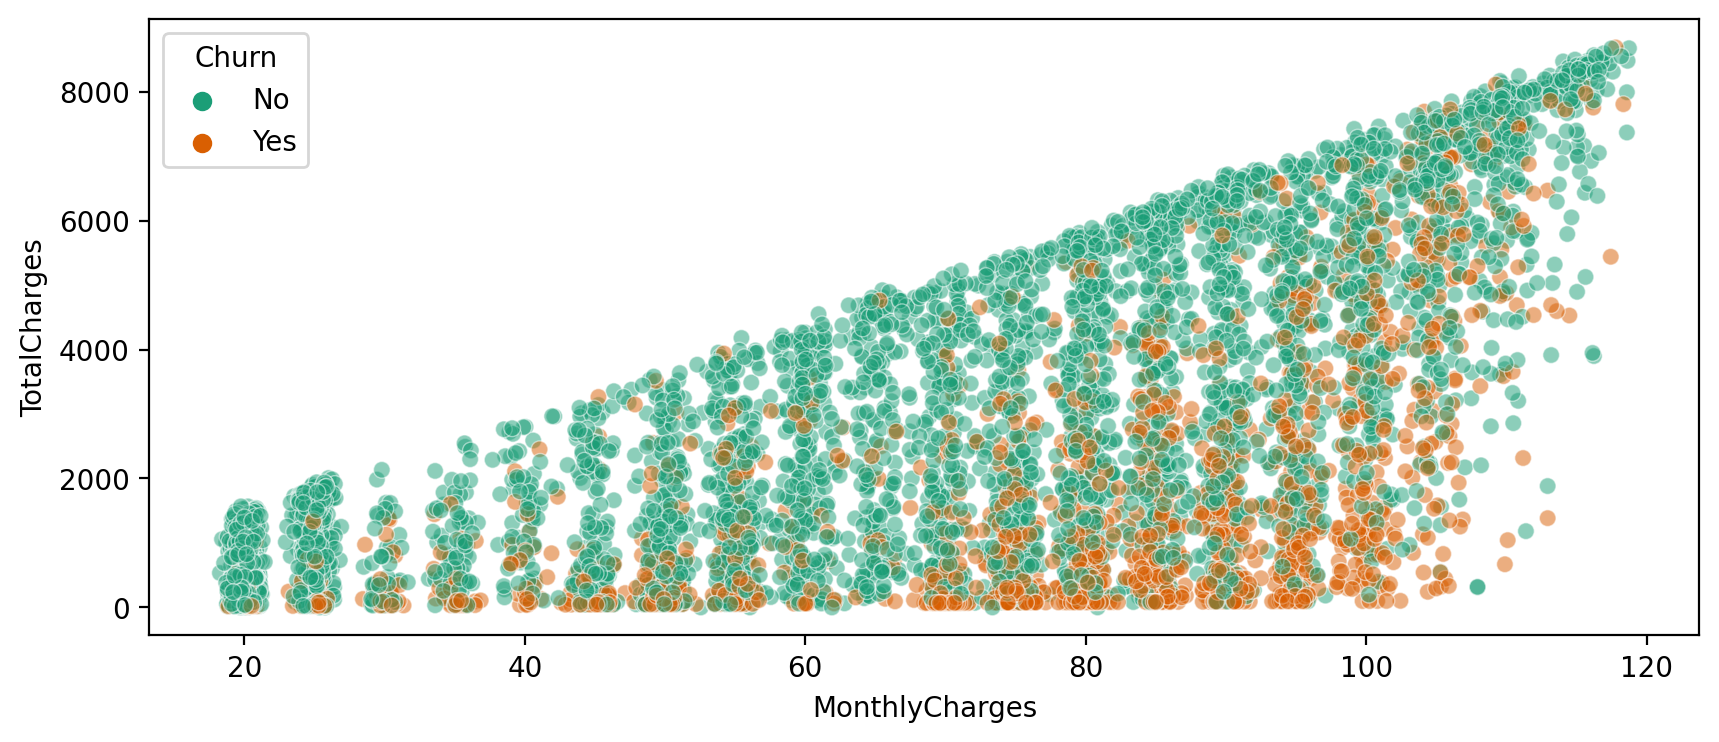

In [20]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2');

### Total Charges versus Monthly Charts, depending on Tenure Cohort

In [21]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'
    
df['Tenure Cohort'] = df['tenure'].apply(cohort)

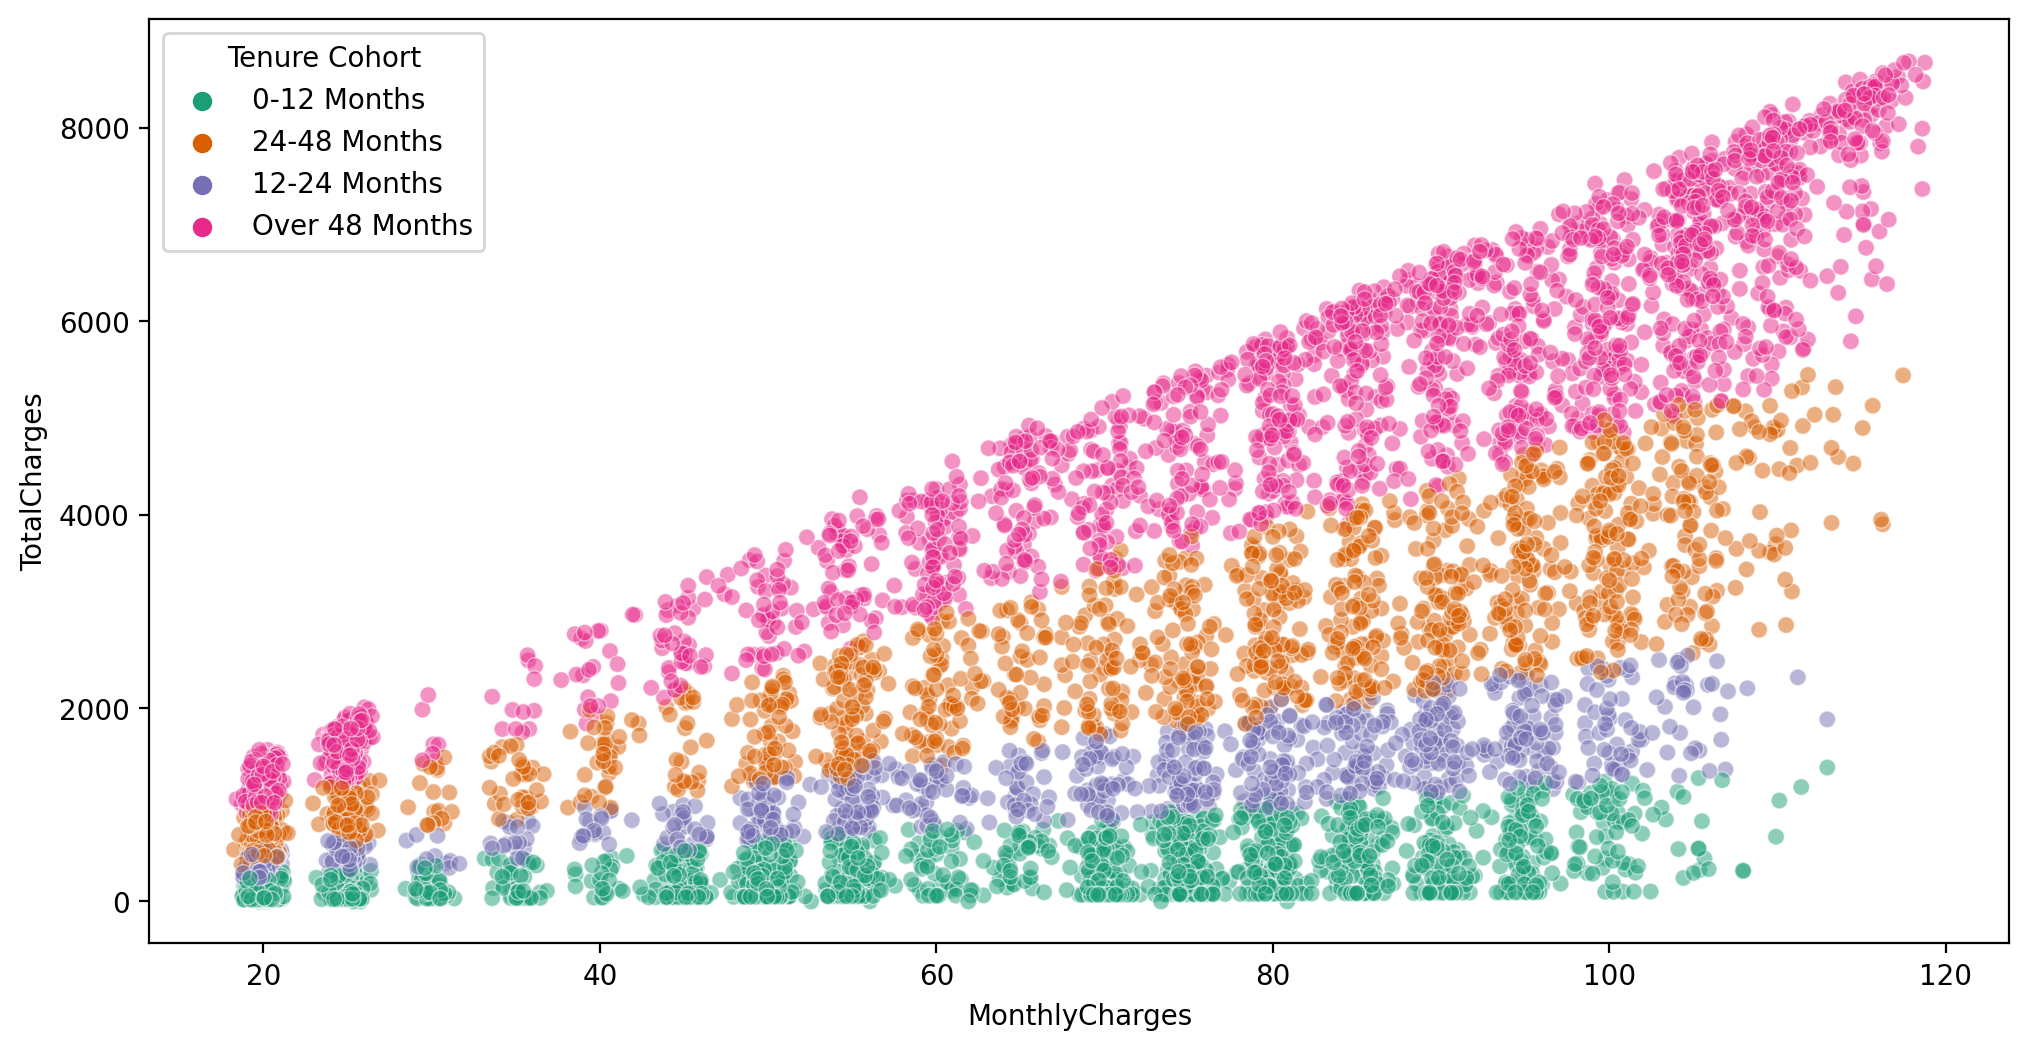

In [22]:
plt.figure(figsize=(12,6), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', linewidth=0.5,alpha=0.5,palette='Dark2');

**There are customers who pay a lot of Month Charges, but their Total Charges are quite small, because of short tenure.**

### Churn count per cohort

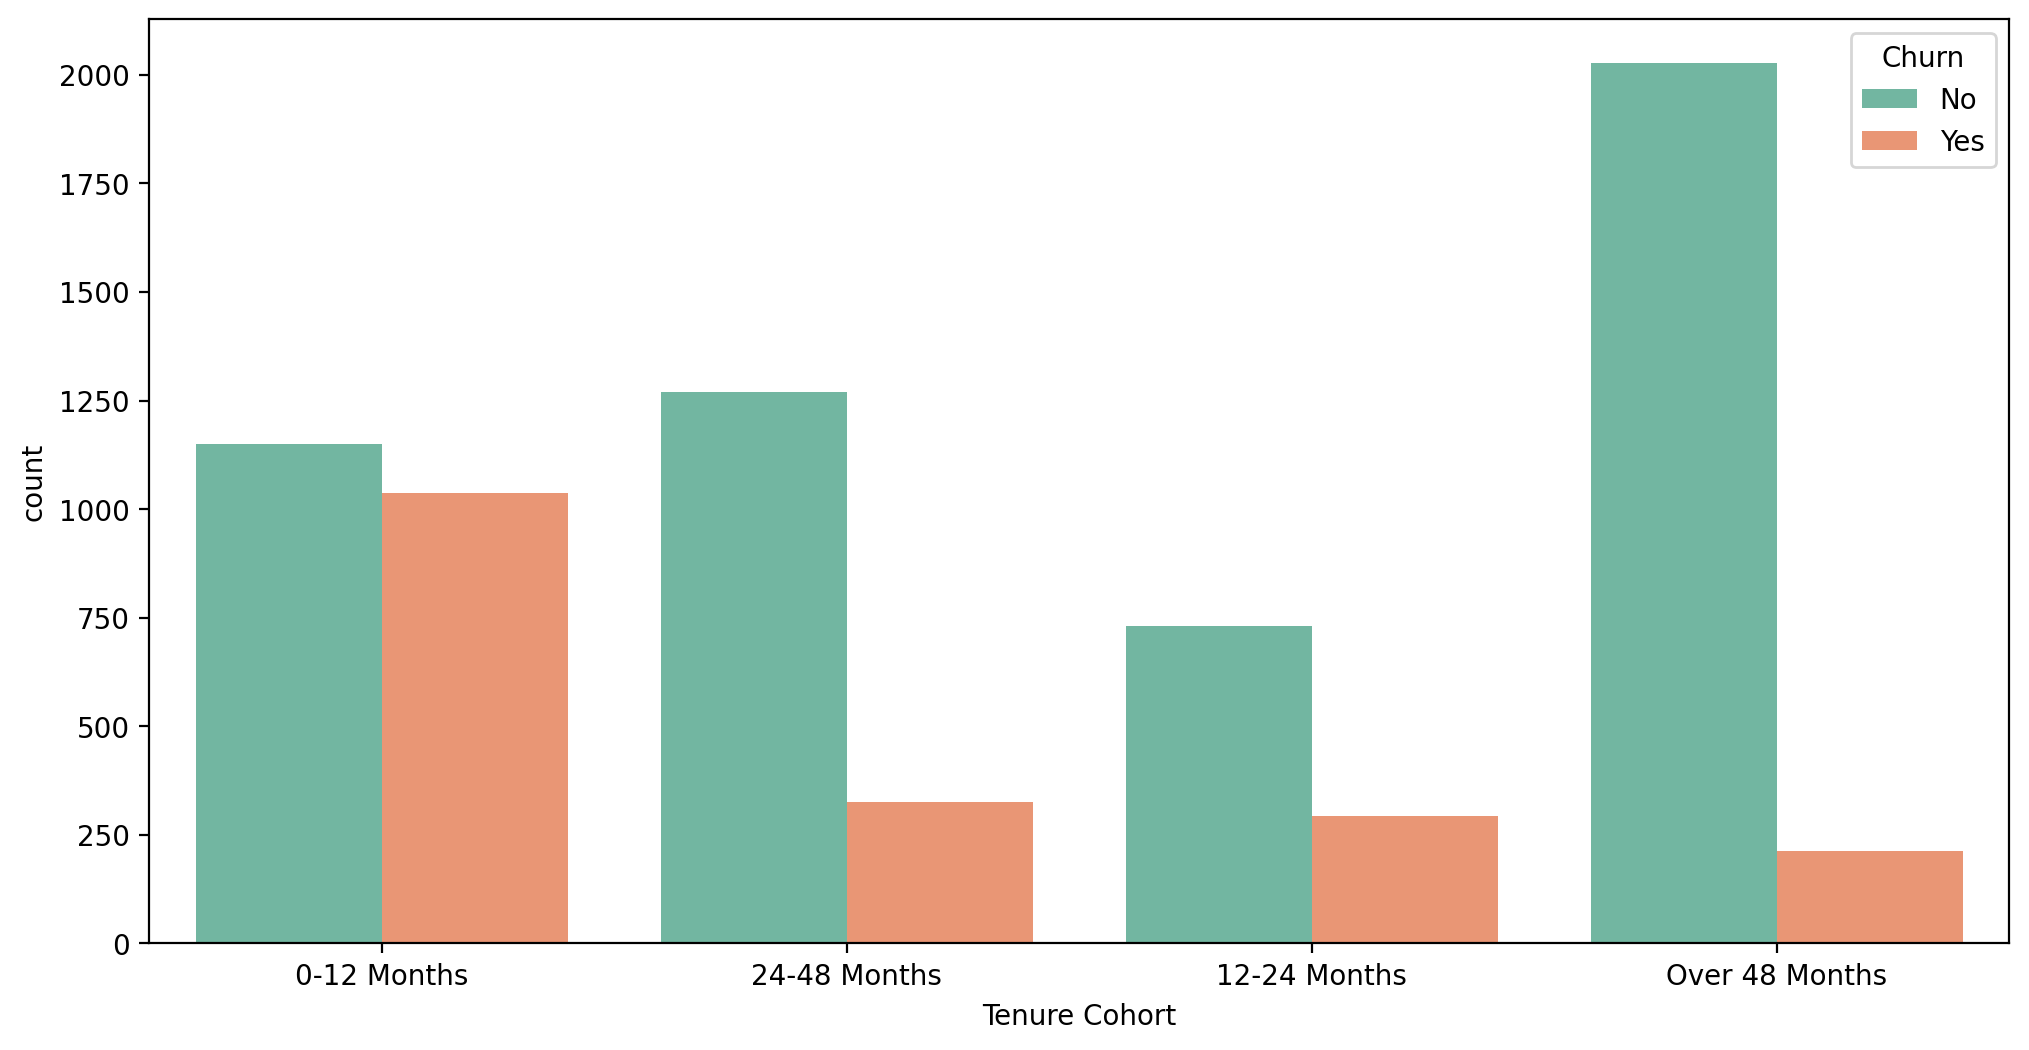

In [23]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x='Tenure Cohort', hue='Churn', palette='Set2');

<Figure size 2000x800 with 0 Axes>

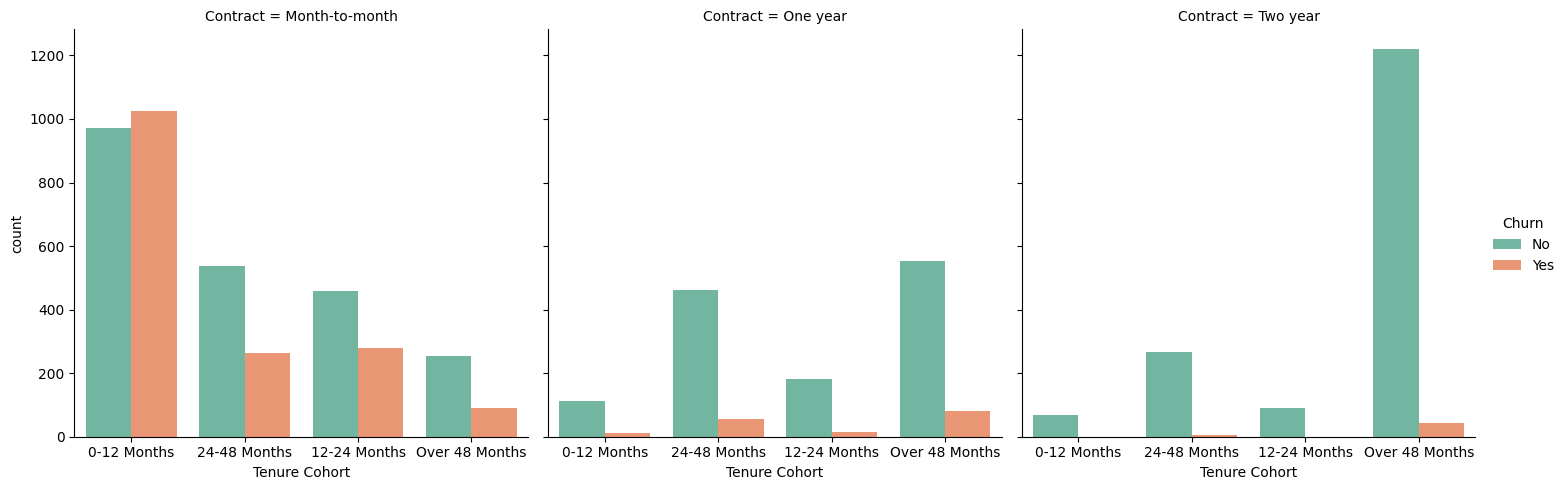

In [24]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count', palette='Set2');

## Predictive Modelling

In [25]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... TechSupport StreamingTV  \
0            No             DSL             No  ...          No          No   
1            No             DSL            Yes  ...          No          No   
2            No             DSL            Yes  ...          No          No   
3            No             DSL            Yes  ...         Yes          No   
4            No     Fiber optic             No  ...          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

  MonthlyCharges TotalCharges  Churn  Tenure Cohort  
0          29.85        29.85     No    0-12 Months  
1          56.95      1889.50     No   24-48 Months  
2          53.85       108.15    Yes    0-12 Months  
3          42.30      1840.75     No   24-48 Months  
4          70.70       151.65    Yes    0-12 Months  

[5 rows x 22 columns]

In [26]:
X = df.drop(['Churn', 'customerID'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [27]:
def evaluate_model(model):
    "Returns a classification report and confusion matrix for a model"
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [28]:
models = []
accuracy = []
precision = []
recall = []
f1_scores = []

In [29]:
def update_lists(model):
    preds = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, preds))
    precision.append(precision_score(y_test, preds, pos_label='Yes'))
    recall.append(recall_score(y_test, preds, pos_label='Yes'))
    f1_scores.append(f1_score(y_test, preds, pos_label='Yes'))

## Logistic Regression

In [30]:
base_log_reg = LogisticRegression(max_iter=10000)

In [31]:
base_log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

              precision    recall  f1-score   support

          No       0.83      0.90      0.86       505
         Yes       0.68      0.53      0.59       200

    accuracy                           0.79       705
   macro avg       0.75      0.71      0.73       705
weighted avg       0.78      0.79      0.79       705



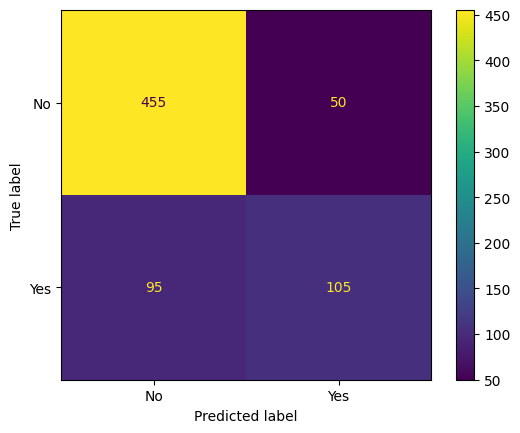

In [32]:
evaluate_model(base_log_reg)

In [33]:
models.append('Logistic Regression')
update_lists(base_log_reg)

## Single Decision Tree

In [34]:
base_decision_tree = DecisionTreeClassifier()

In [35]:
base_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

          No       0.79      0.80      0.79       505
         Yes       0.47      0.46      0.46       200

    accuracy                           0.70       705
   macro avg       0.63      0.63      0.63       705
weighted avg       0.70      0.70      0.70       705



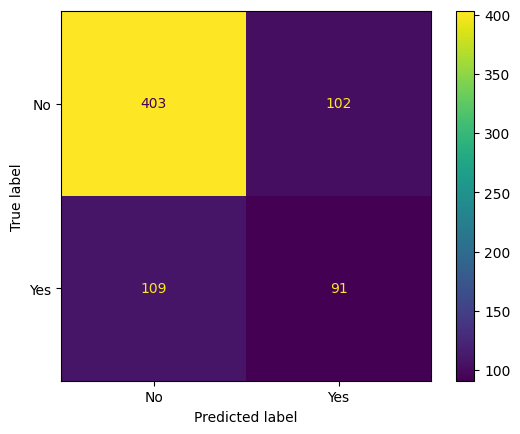

In [36]:
evaluate_model(base_decision_tree)

In [37]:
models.append('Decision Tree')

In [38]:
update_lists(base_decision_tree)

## Random Forest

In [39]:
base_rf = RandomForestClassifier(n_estimators=100)

In [40]:
base_rf.fit(X_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

          No       0.80      0.89      0.84       505
         Yes       0.60      0.43      0.50       200

    accuracy                           0.76       705
   macro avg       0.70      0.66      0.67       705
weighted avg       0.74      0.76      0.74       705



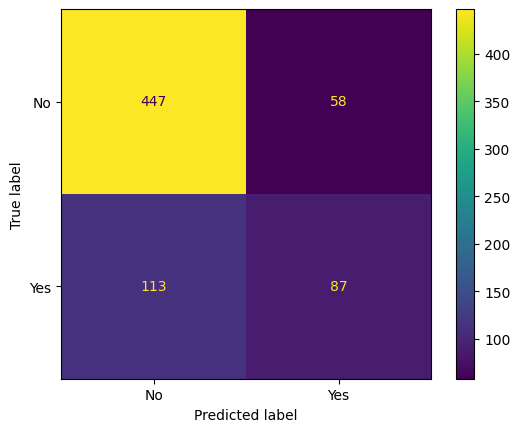

In [41]:
evaluate_model(base_rf)

In [42]:
models.append('Random Forest')
update_lists(base_rf)

## Base Models Results

In [43]:
data = {'models': models,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_scores
        }

df_result_sum = pd.DataFrame(data)

In [44]:
df_result_sum

models  accuracy  precision  recall  f1_score
0  Logistic Regression  0.794326   0.677419   0.525  0.591549
1        Decision Tree  0.700709   0.471503   0.455  0.463104
2        Random Forest  0.757447   0.600000   0.435  0.504348

- **The scores for base models are quite bad, especially recall scores.** This can be expained by the **imbalance of the dataset** (only 26.54 % of churned customers)

## Over Sampling

In [45]:
# implementing random over sampling
ros = RandomOverSampler(sampling_strategy="not majority") 
x_res, y_res = ros.fit_resample(X,y)

In [46]:
churn_yes = round(len(y_res[y_res == 'Yes'])/len(y_res)*100,2)
churn_no = round(len(y_res[y_res == 'No'])/len(y_res)*100,2)

print(x_res.shape)
print(y_res.shape)
print('Churn:', churn_yes, '%')
print('No churn:', churn_no, '%')

(10348, 26)
(10348,)
Churn: 50.0 %
No churn: 50.0 %


In [47]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.1, random_state=101)

- After perorming random over sampling, **the dataset have become balanced of 50/50**

## Hyperparameter Tuning

## Logistic Regression

In [48]:
log_model = LogisticRegressionCV(max_iter=10000)

In [49]:
log_model.fit(X_train, y_train)

LogisticRegressionCV(max_iter=10000)

              precision    recall  f1-score   support

          No       0.76      0.73      0.74       524
         Yes       0.73      0.76      0.75       511

    accuracy                           0.74      1035
   macro avg       0.74      0.74      0.74      1035
weighted avg       0.74      0.74      0.74      1035



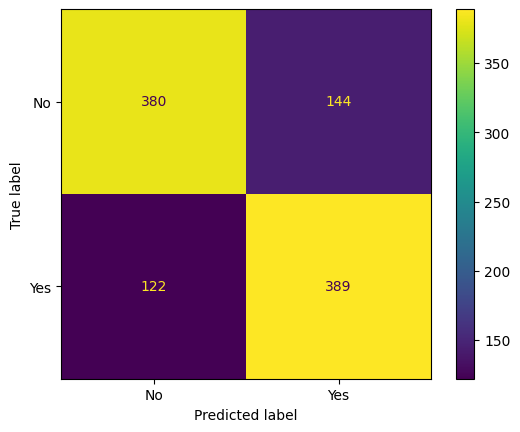

In [50]:
evaluate_model(log_model)

In [51]:
models.append('Logistic Regression (OS+CV)')
update_lists(log_model)

## SVC

In [52]:
svc = LinearSVC(C=0.01, max_iter=100000)

In [53]:
svc.fit(X_train, y_train)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=0.01, max_iter=100000)

              precision    recall  f1-score   support

          No       0.78      0.71      0.74       524
         Yes       0.73      0.80      0.76       511

    accuracy                           0.75      1035
   macro avg       0.75      0.75      0.75      1035
weighted avg       0.76      0.75      0.75      1035



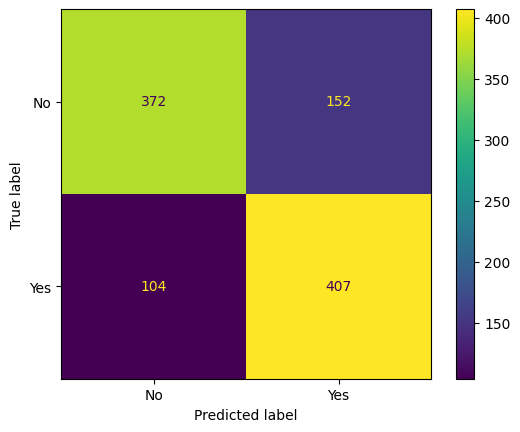

In [54]:
evaluate_model(svc)

In [56]:
models.append('SVC (OS)')
update_lists(svc)

## Single Decision Tree

In [152]:
base_dt = DecisionTreeClassifier()

In [153]:
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
             'max_depth': np.arange(2,10,1),
             'min_impurity_decrease': [0.001,0,1,0.2,0.375,0.5,0.7],
             'max_leaf_nodes': [2,4,6,8,10,20]}

In [155]:
decision_tree_grid = GridSearchCV(base_dt, param_grid)

In [156]:
decision_tree_grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_leaf_nodes': [2, 4, 6, 8, 10, 20],
                         'min_impurity_decrease': [0.001, 0, 1, 0.2, 0.375, 0.5,
                                                   0.7]})

In [157]:
decision_tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20,
                       min_impurity_decrease=0.001)

In [158]:
decision_tree_grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0.001}

In [57]:
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=7, max_leaf_nodes=20,
                                       min_impurity_decrease=0.001)

In [58]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20,
                       min_impurity_decrease=0.001)

              precision    recall  f1-score   support

          No       0.80      0.70      0.74       524
         Yes       0.73      0.82      0.77       511

    accuracy                           0.76      1035
   macro avg       0.76      0.76      0.76      1035
weighted avg       0.76      0.76      0.76      1035



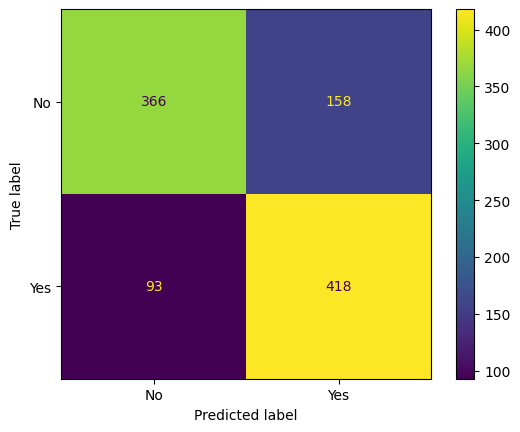

In [59]:
evaluate_model(decision_tree)

In [60]:
models.append('Decision Tree (OS+tuning)')
update_lists(decision_tree)

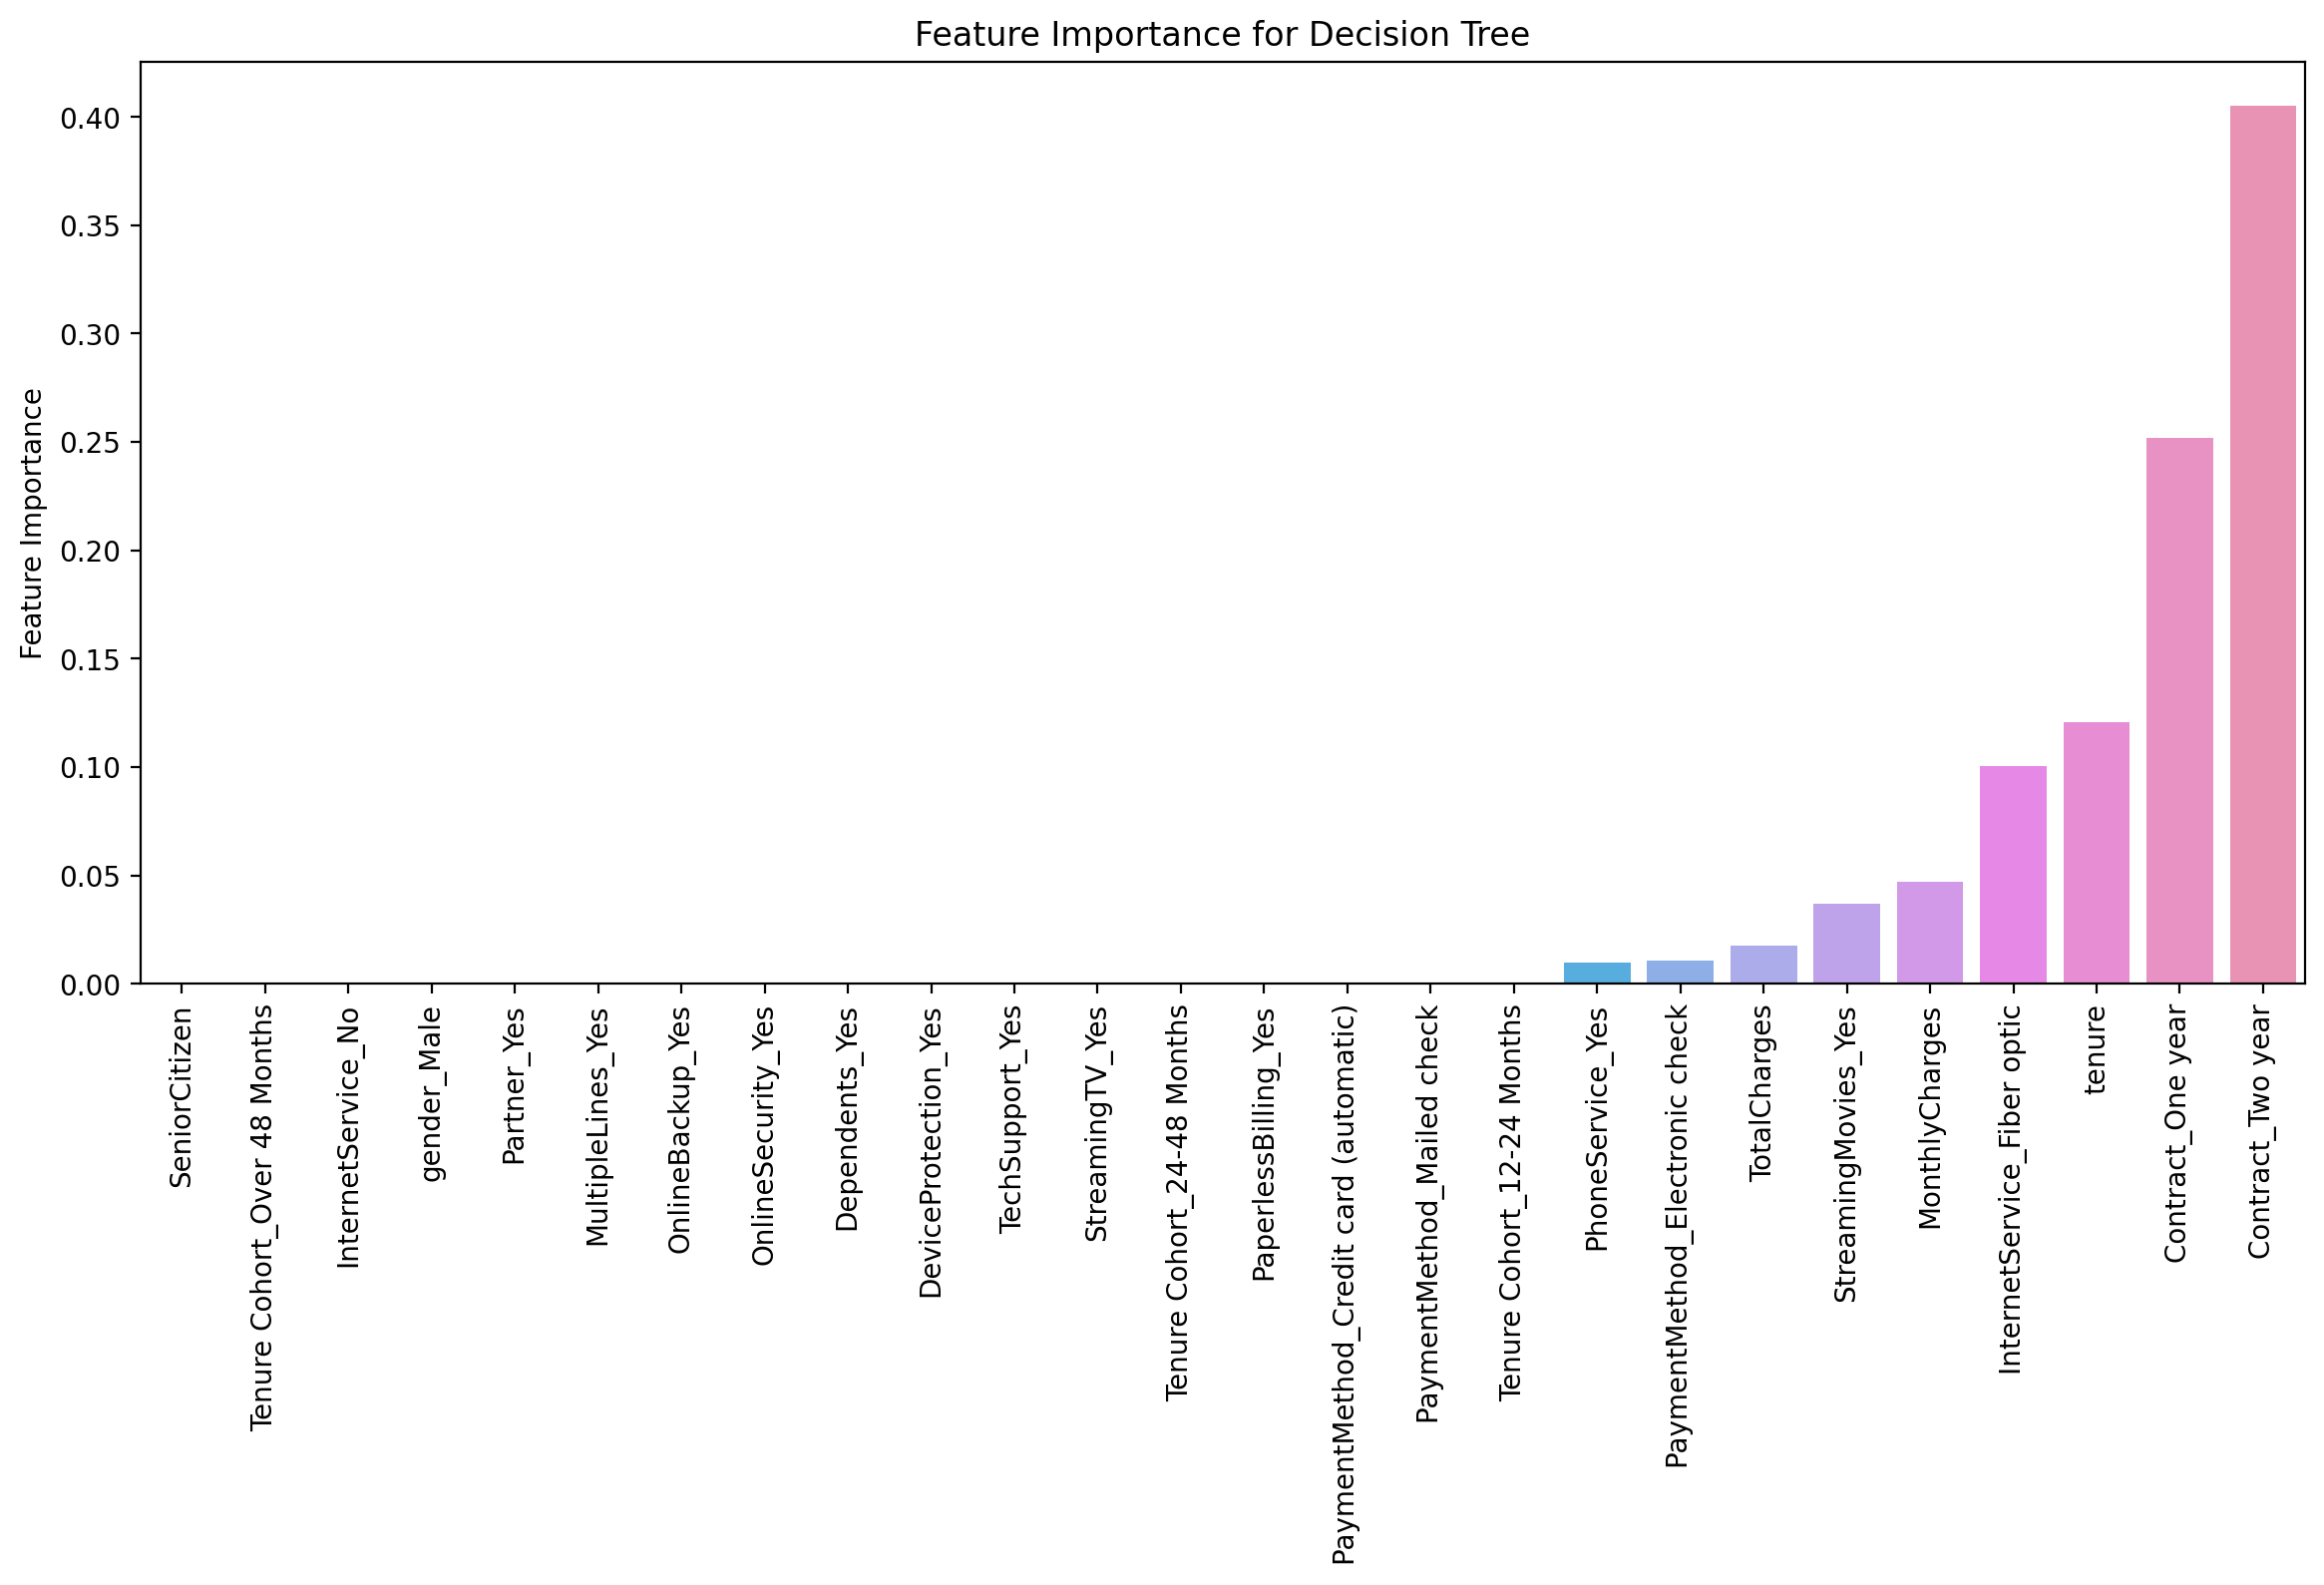

In [61]:
imp_feats = pd.DataFrame(data=decision_tree.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

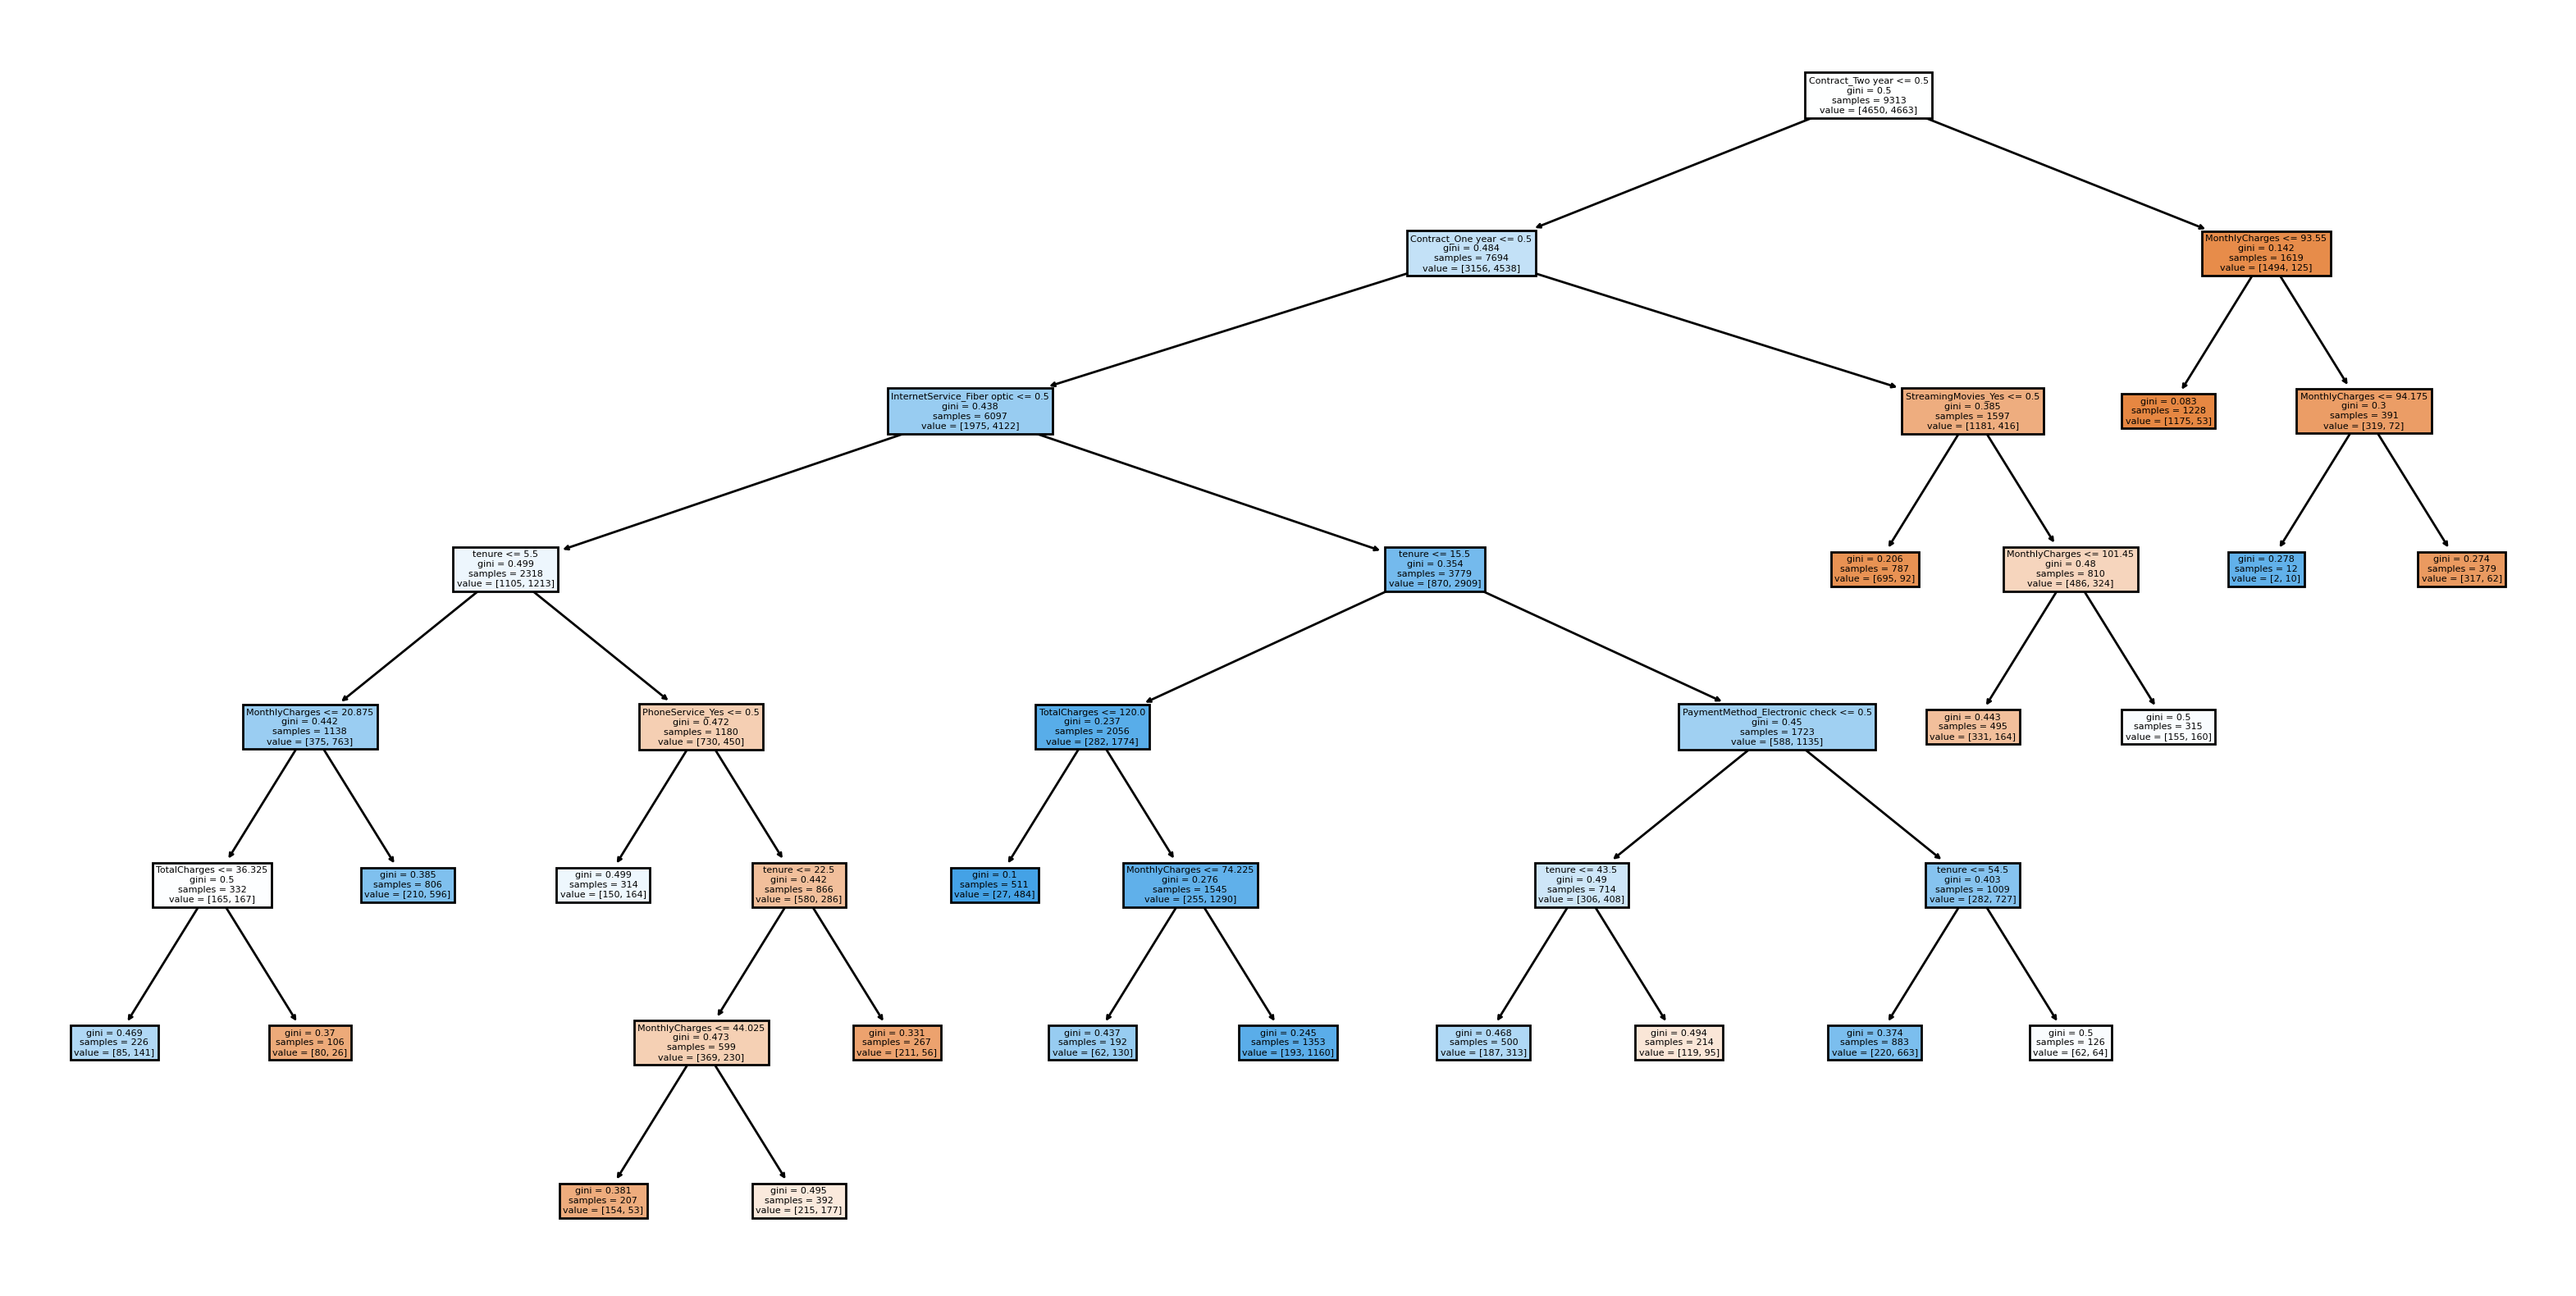

In [62]:
plt.figure(figsize=(20,10), dpi=200)
plot_tree(decision_tree, feature_names=X.columns, filled=True)
plt.savefig('Decision_Tree.png');

**For a single Decision Tree, the top 5 most important features are Contract Type, Tenure, using Fiber optic, Monthly Charges, Streaming Movies.**

### Random Forest

In [167]:
base_rf = RandomForestClassifier()

In [63]:
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
             'n_estimators': [64,100,128,200],
             'max_features': [2,3,4],
             'bootstrap': [True, False]}

In [64]:
grid_rf = GridSearchCV(base_rf, param_grid)

In [65]:
grid_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200]})

In [66]:
grid_rf.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='log_loss', max_features=3,
                       n_estimators=128)

In [67]:
grid_rf.best_params_

{'bootstrap': False,
 'criterion': 'log_loss',
 'max_features': 3,
 'n_estimators': 128}

In [74]:
random_forest = RandomForestClassifier(bootstrap=False, criterion='log_loss', max_features=3,
                                       n_estimators=128)

In [75]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='log_loss', max_features=3,
                       n_estimators=128)

              precision    recall  f1-score   support

          No       0.95      0.87      0.91       524
         Yes       0.88      0.95      0.91       511

    accuracy                           0.91      1035
   macro avg       0.91      0.91      0.91      1035
weighted avg       0.91      0.91      0.91      1035



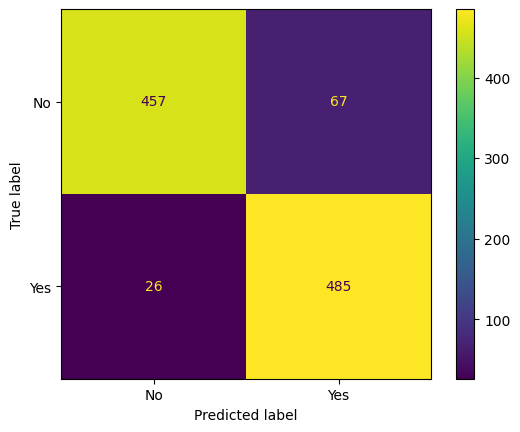

In [76]:
evaluate_model(random_forest)

In [77]:
models.append('Random Forest (OS+tuning)')
update_lists(random_forest)

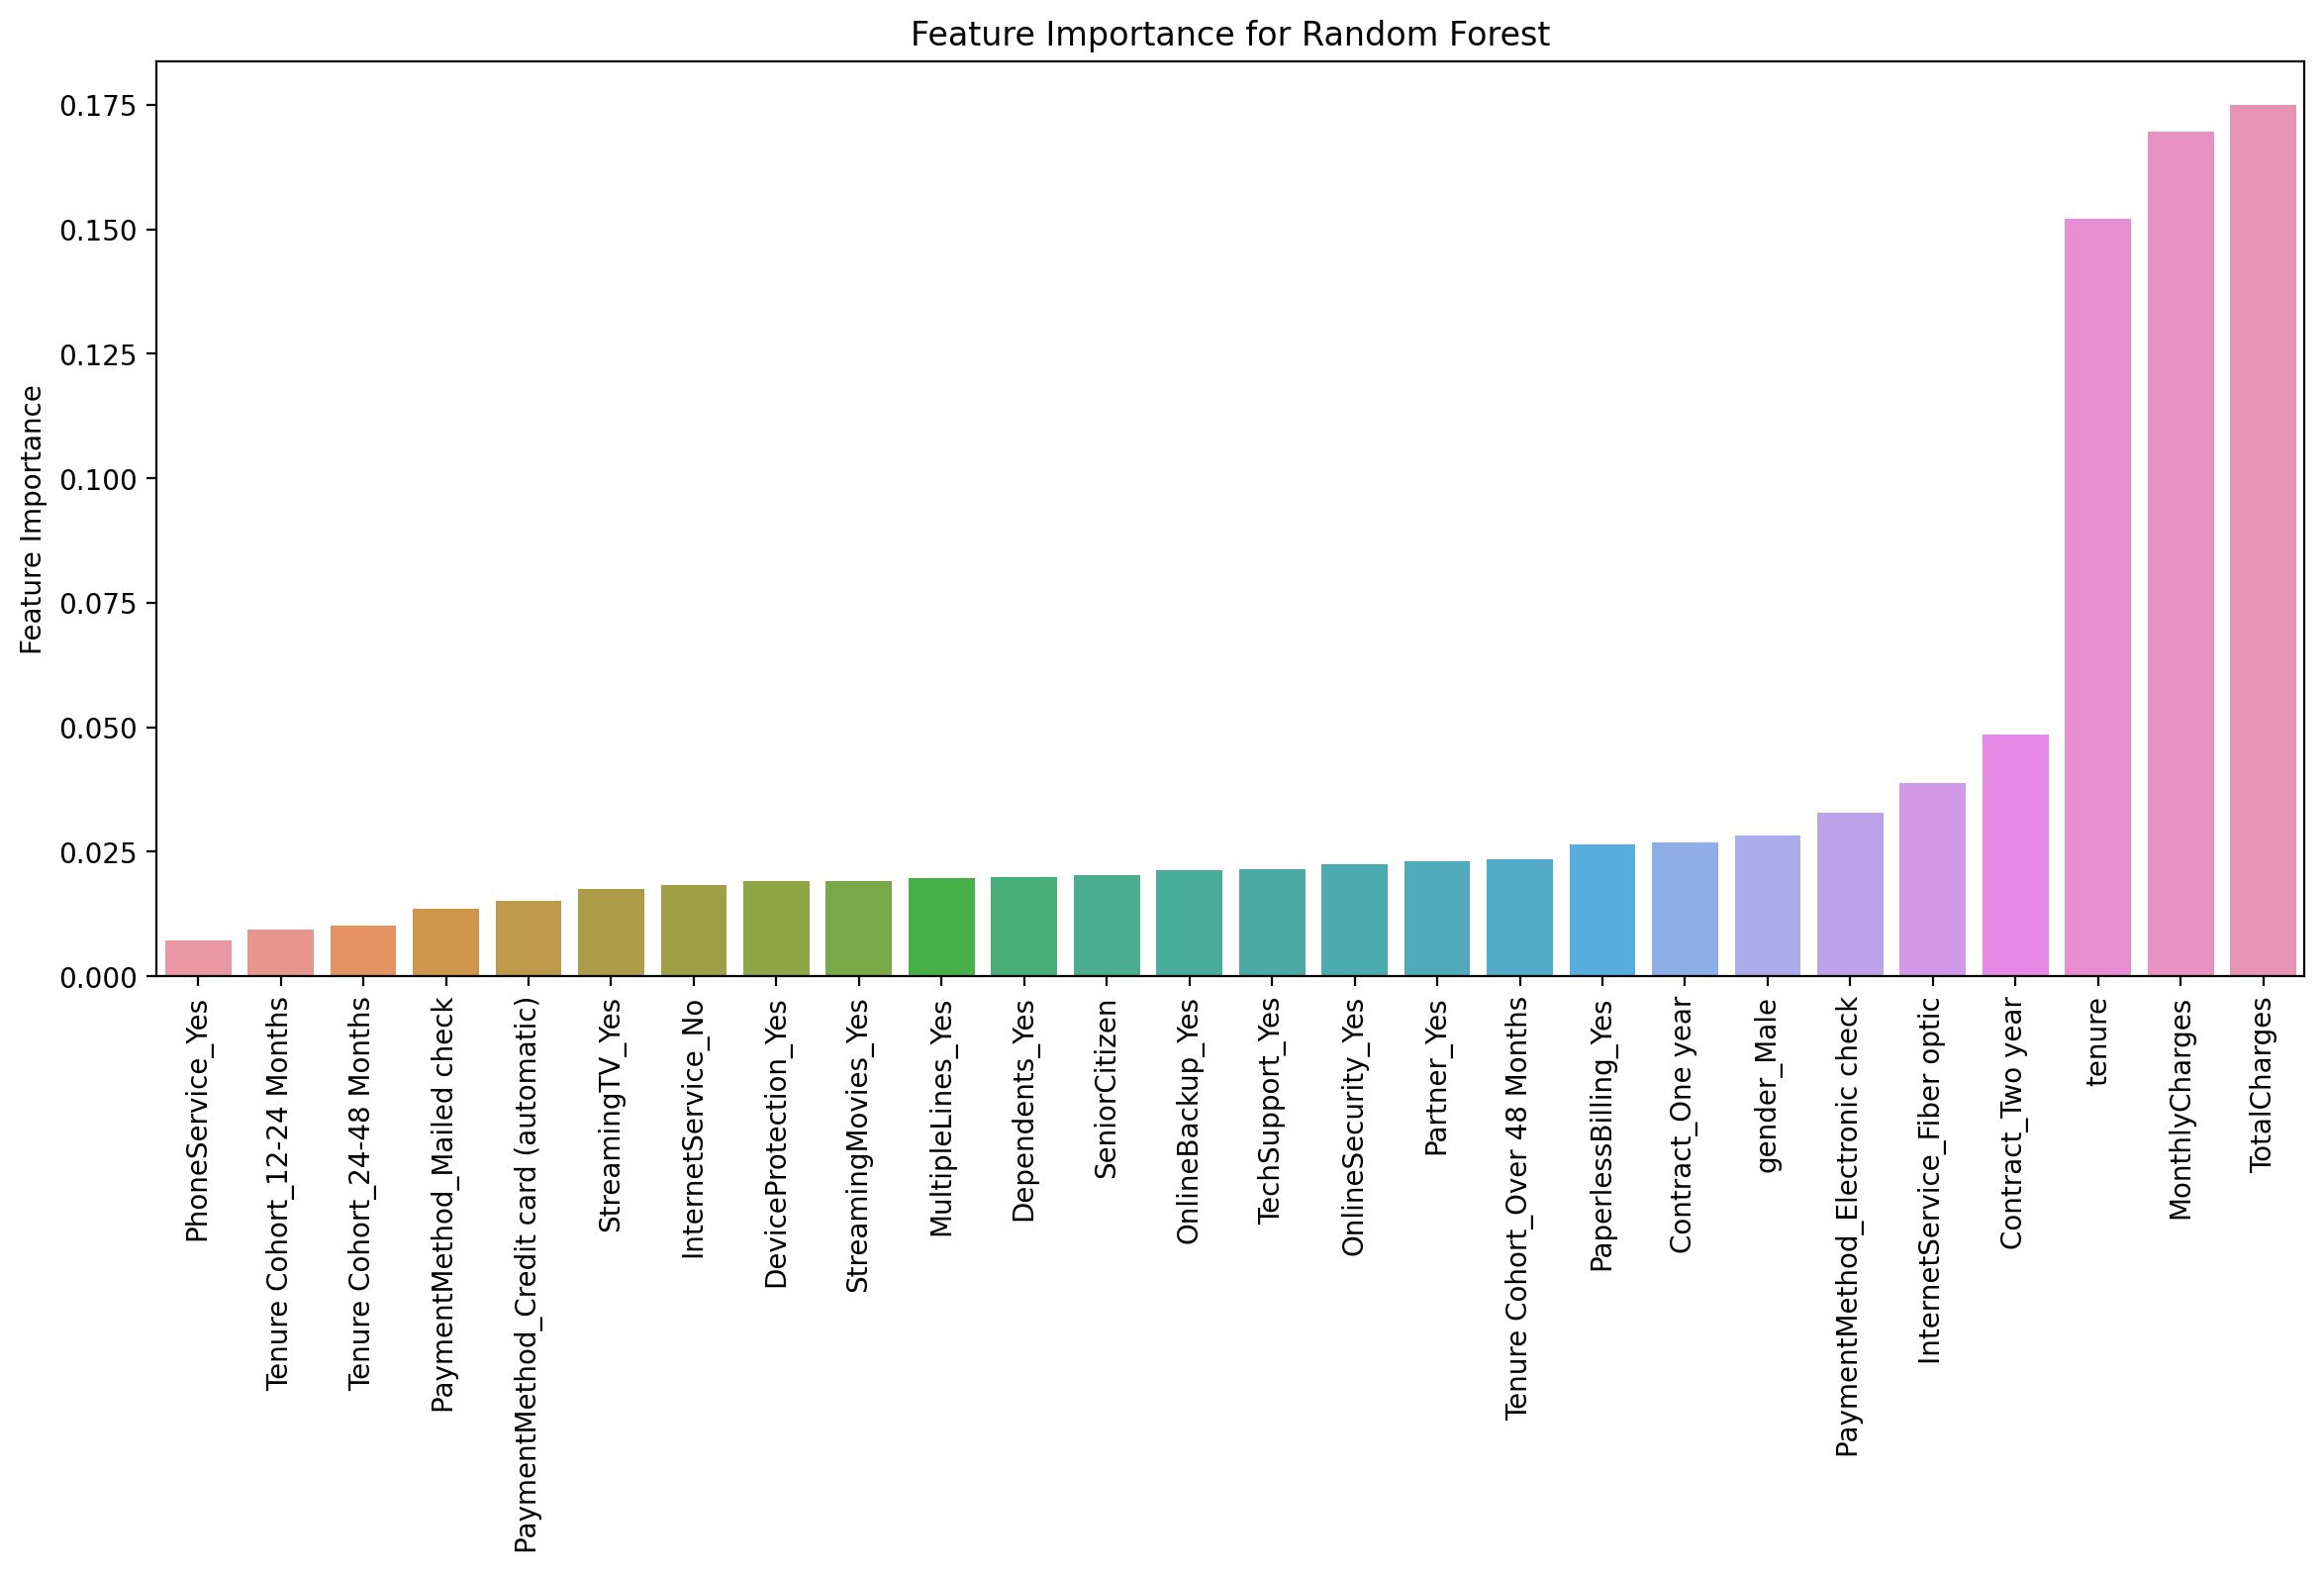

In [97]:
imp_feats_rf = pd.DataFrame(data=random_forest.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats_rf.sort_values('Feature Importance'),x=imp_feats_rf.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Random Forest");

**For a Random Forest Classifier, the top 5 most important features are Total and Monthly Charges, Tenure, Contract Type, using Fiber optic.**

## Boosted Trees

### Adaptive Boosting

In [180]:
base_ada = AdaBoostClassifier()

In [181]:
param_grid = {'n_estimators':np.arange(100,200,1)}

In [182]:
grid_ada = GridSearchCV(base_ada, param_grid)

In [183]:
grid_ada.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199])})

In [184]:
grid_ada.best_estimator_

AdaBoostClassifier(n_estimators=101)

In [185]:
grid_ada.best_params_

{'n_estimators': 101}

In [78]:
ada_boost = AdaBoostClassifier(n_estimators=101)

In [79]:
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=101)

              precision    recall  f1-score   support

          No       0.80      0.70      0.75       524
         Yes       0.73      0.81      0.77       511

    accuracy                           0.76      1035
   macro avg       0.76      0.76      0.76      1035
weighted avg       0.76      0.76      0.76      1035



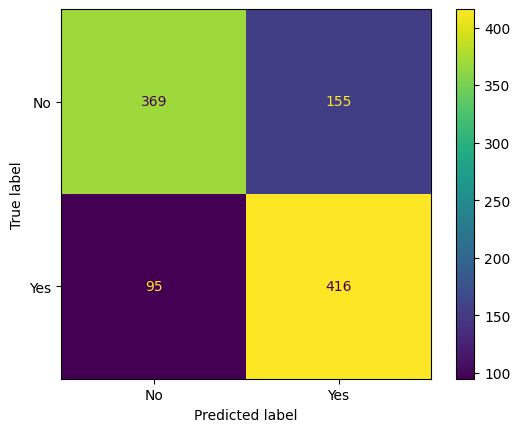

In [80]:
evaluate_model(ada_boost)

In [81]:
models.append('Adaptive Boosting')
update_lists(ada_boost)

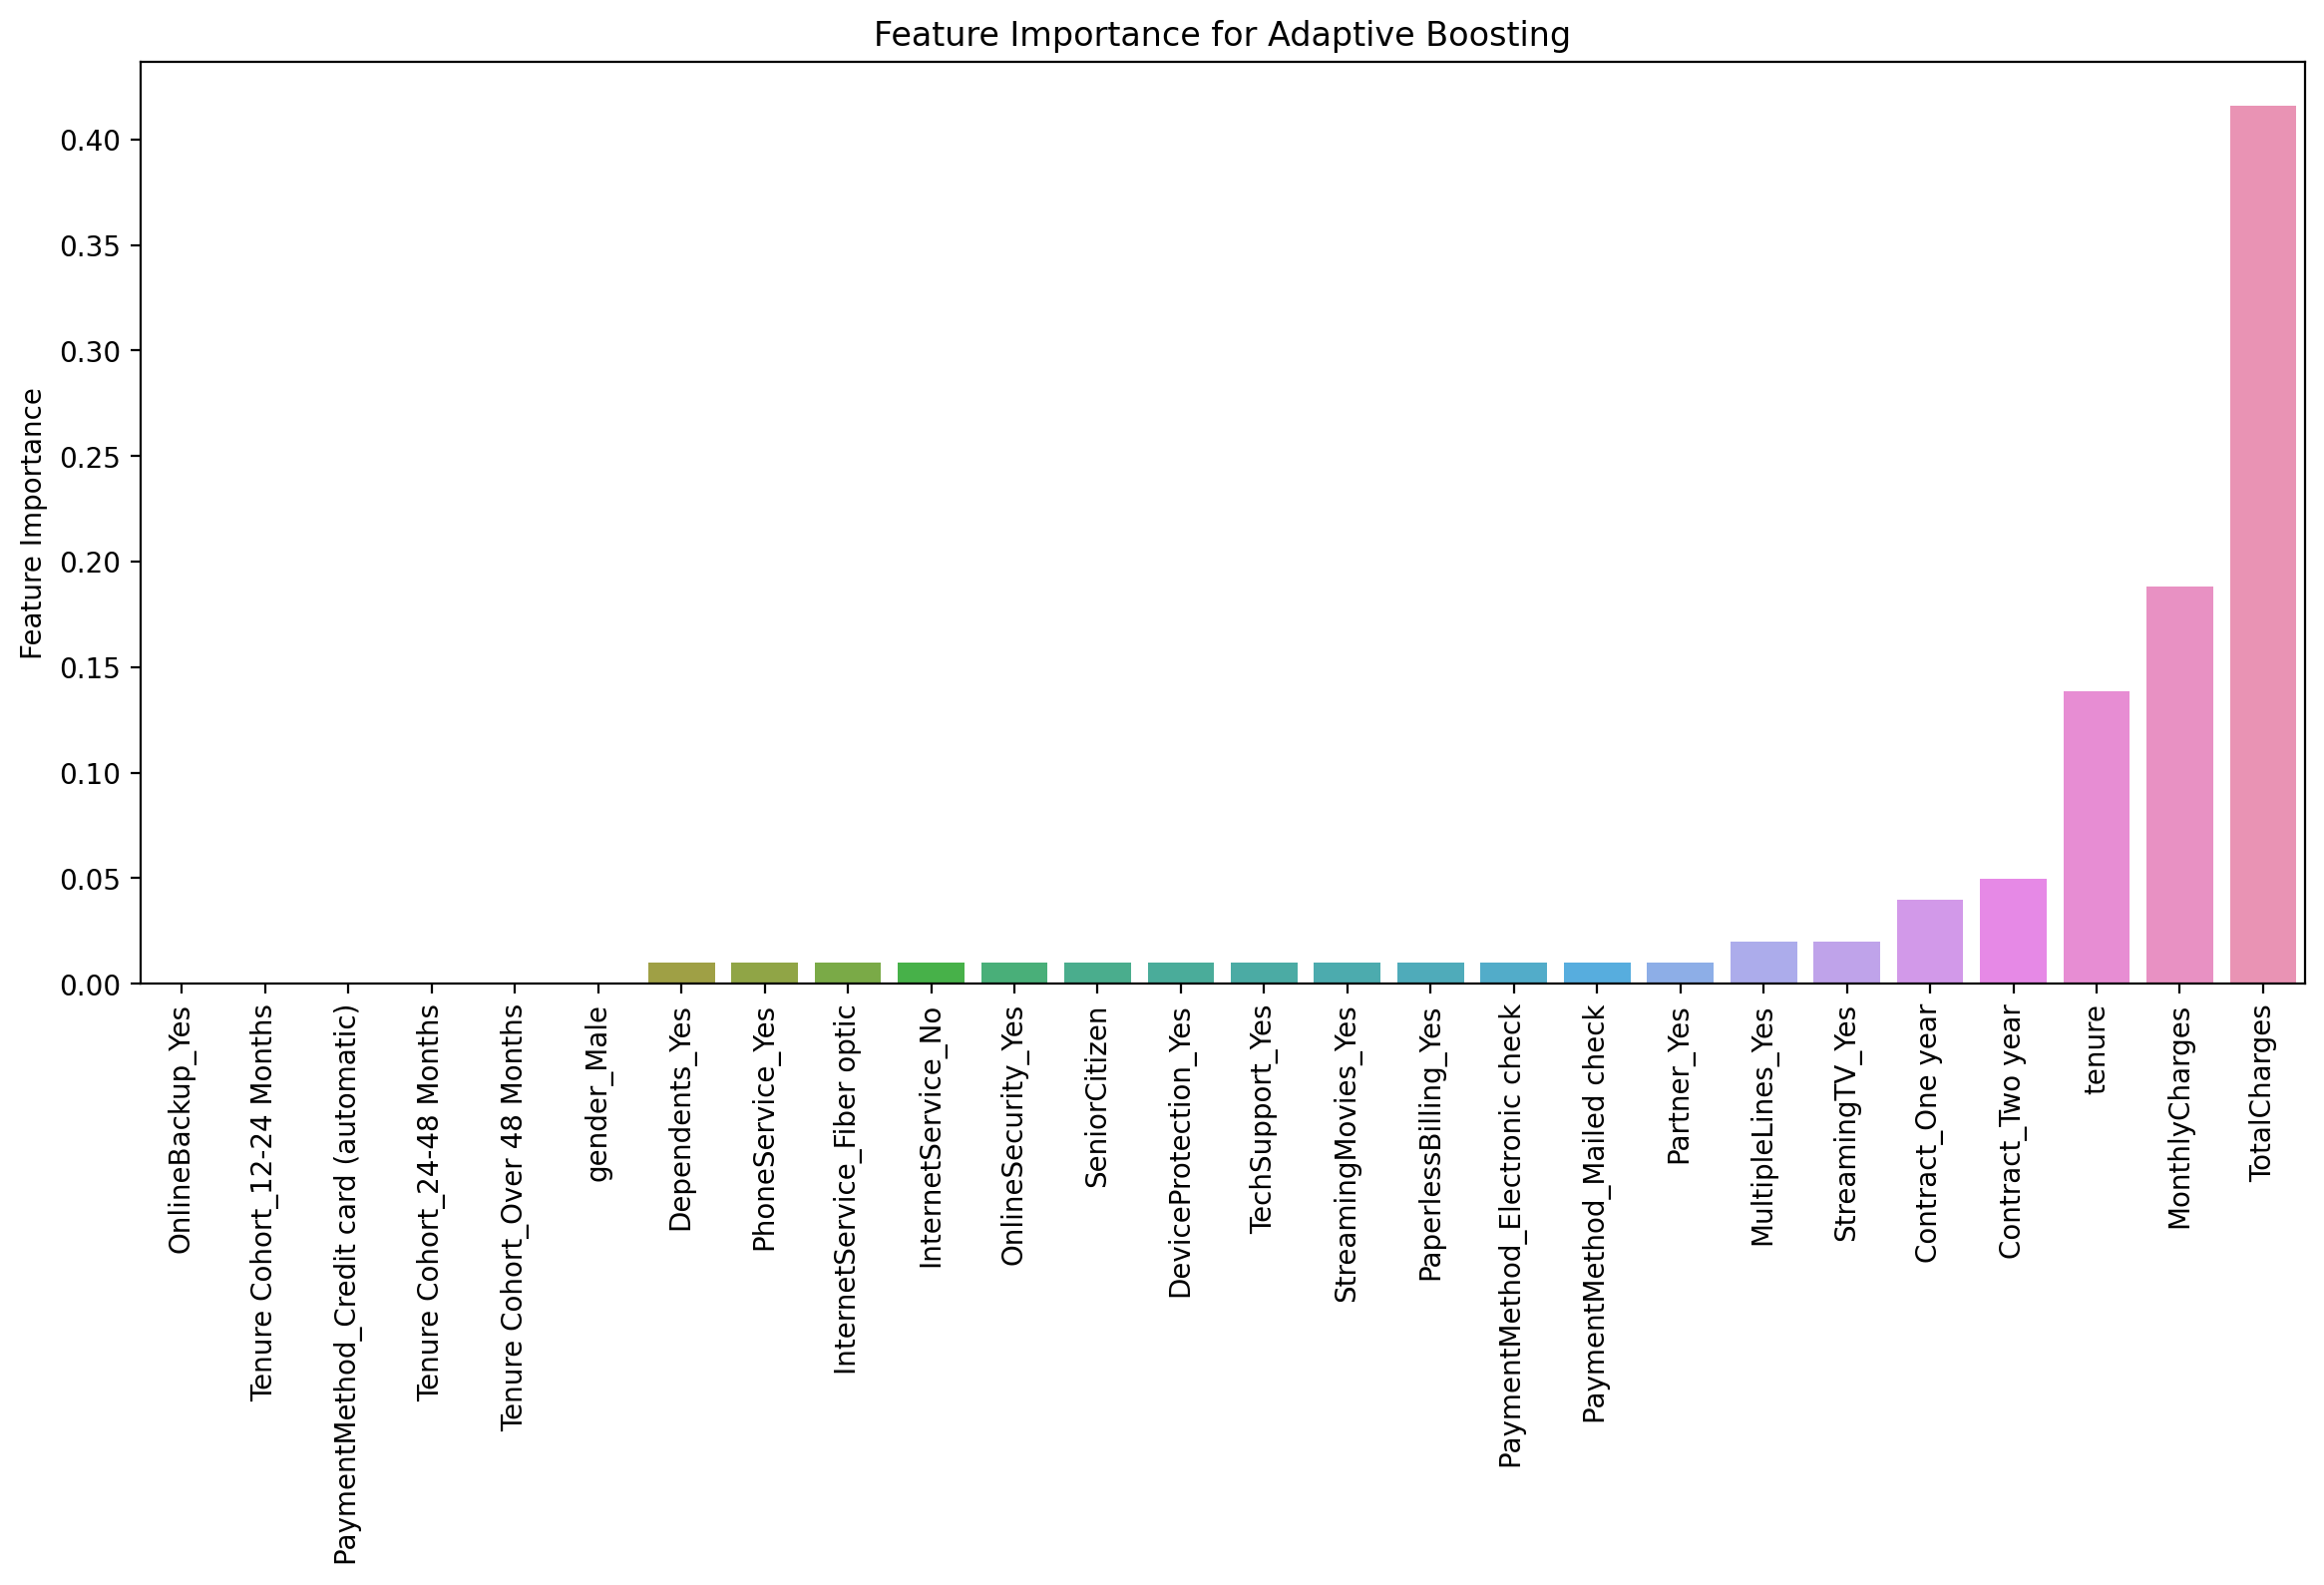

In [103]:
imp_feats_ada = pd.DataFrame(data=ada_boost.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats_ada.sort_values('Feature Importance'),x=imp_feats_ada.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Adaptive Boosting");

**For Adaptive Boosting Classifier, the top 5 most important features are Total and Monthly Charges, Tenure, Contract Type, Streaming TV.**

### Gradient Boosting

In [193]:
gb_model = GradientBoostingClassifier()

In [194]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [196]:
grid_gb = GridSearchCV(gb_model,param_grid)

In [197]:
grid_gb.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [198]:
grid_gb.best_estimator_

GradientBoostingClassifier(max_depth=6)

In [199]:
grid_gb.best_params_

{'max_depth': 6, 'n_estimators': 100}

In [82]:
gradient_boost = GradientBoostingClassifier(max_depth=6, n_estimators=100)

In [83]:
gradient_boost.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=6)

              precision    recall  f1-score   support

          No       0.87      0.77      0.81       524
         Yes       0.79      0.88      0.83       511

    accuracy                           0.82      1035
   macro avg       0.83      0.82      0.82      1035
weighted avg       0.83      0.82      0.82      1035



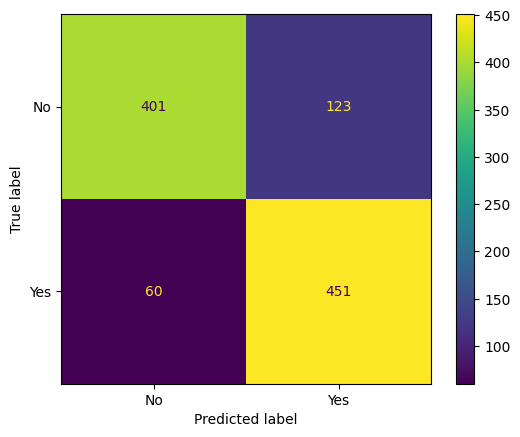

In [84]:
evaluate_model(gradient_boost)

In [85]:
models.append('Gradient Boosting')
update_lists(gradient_boost)

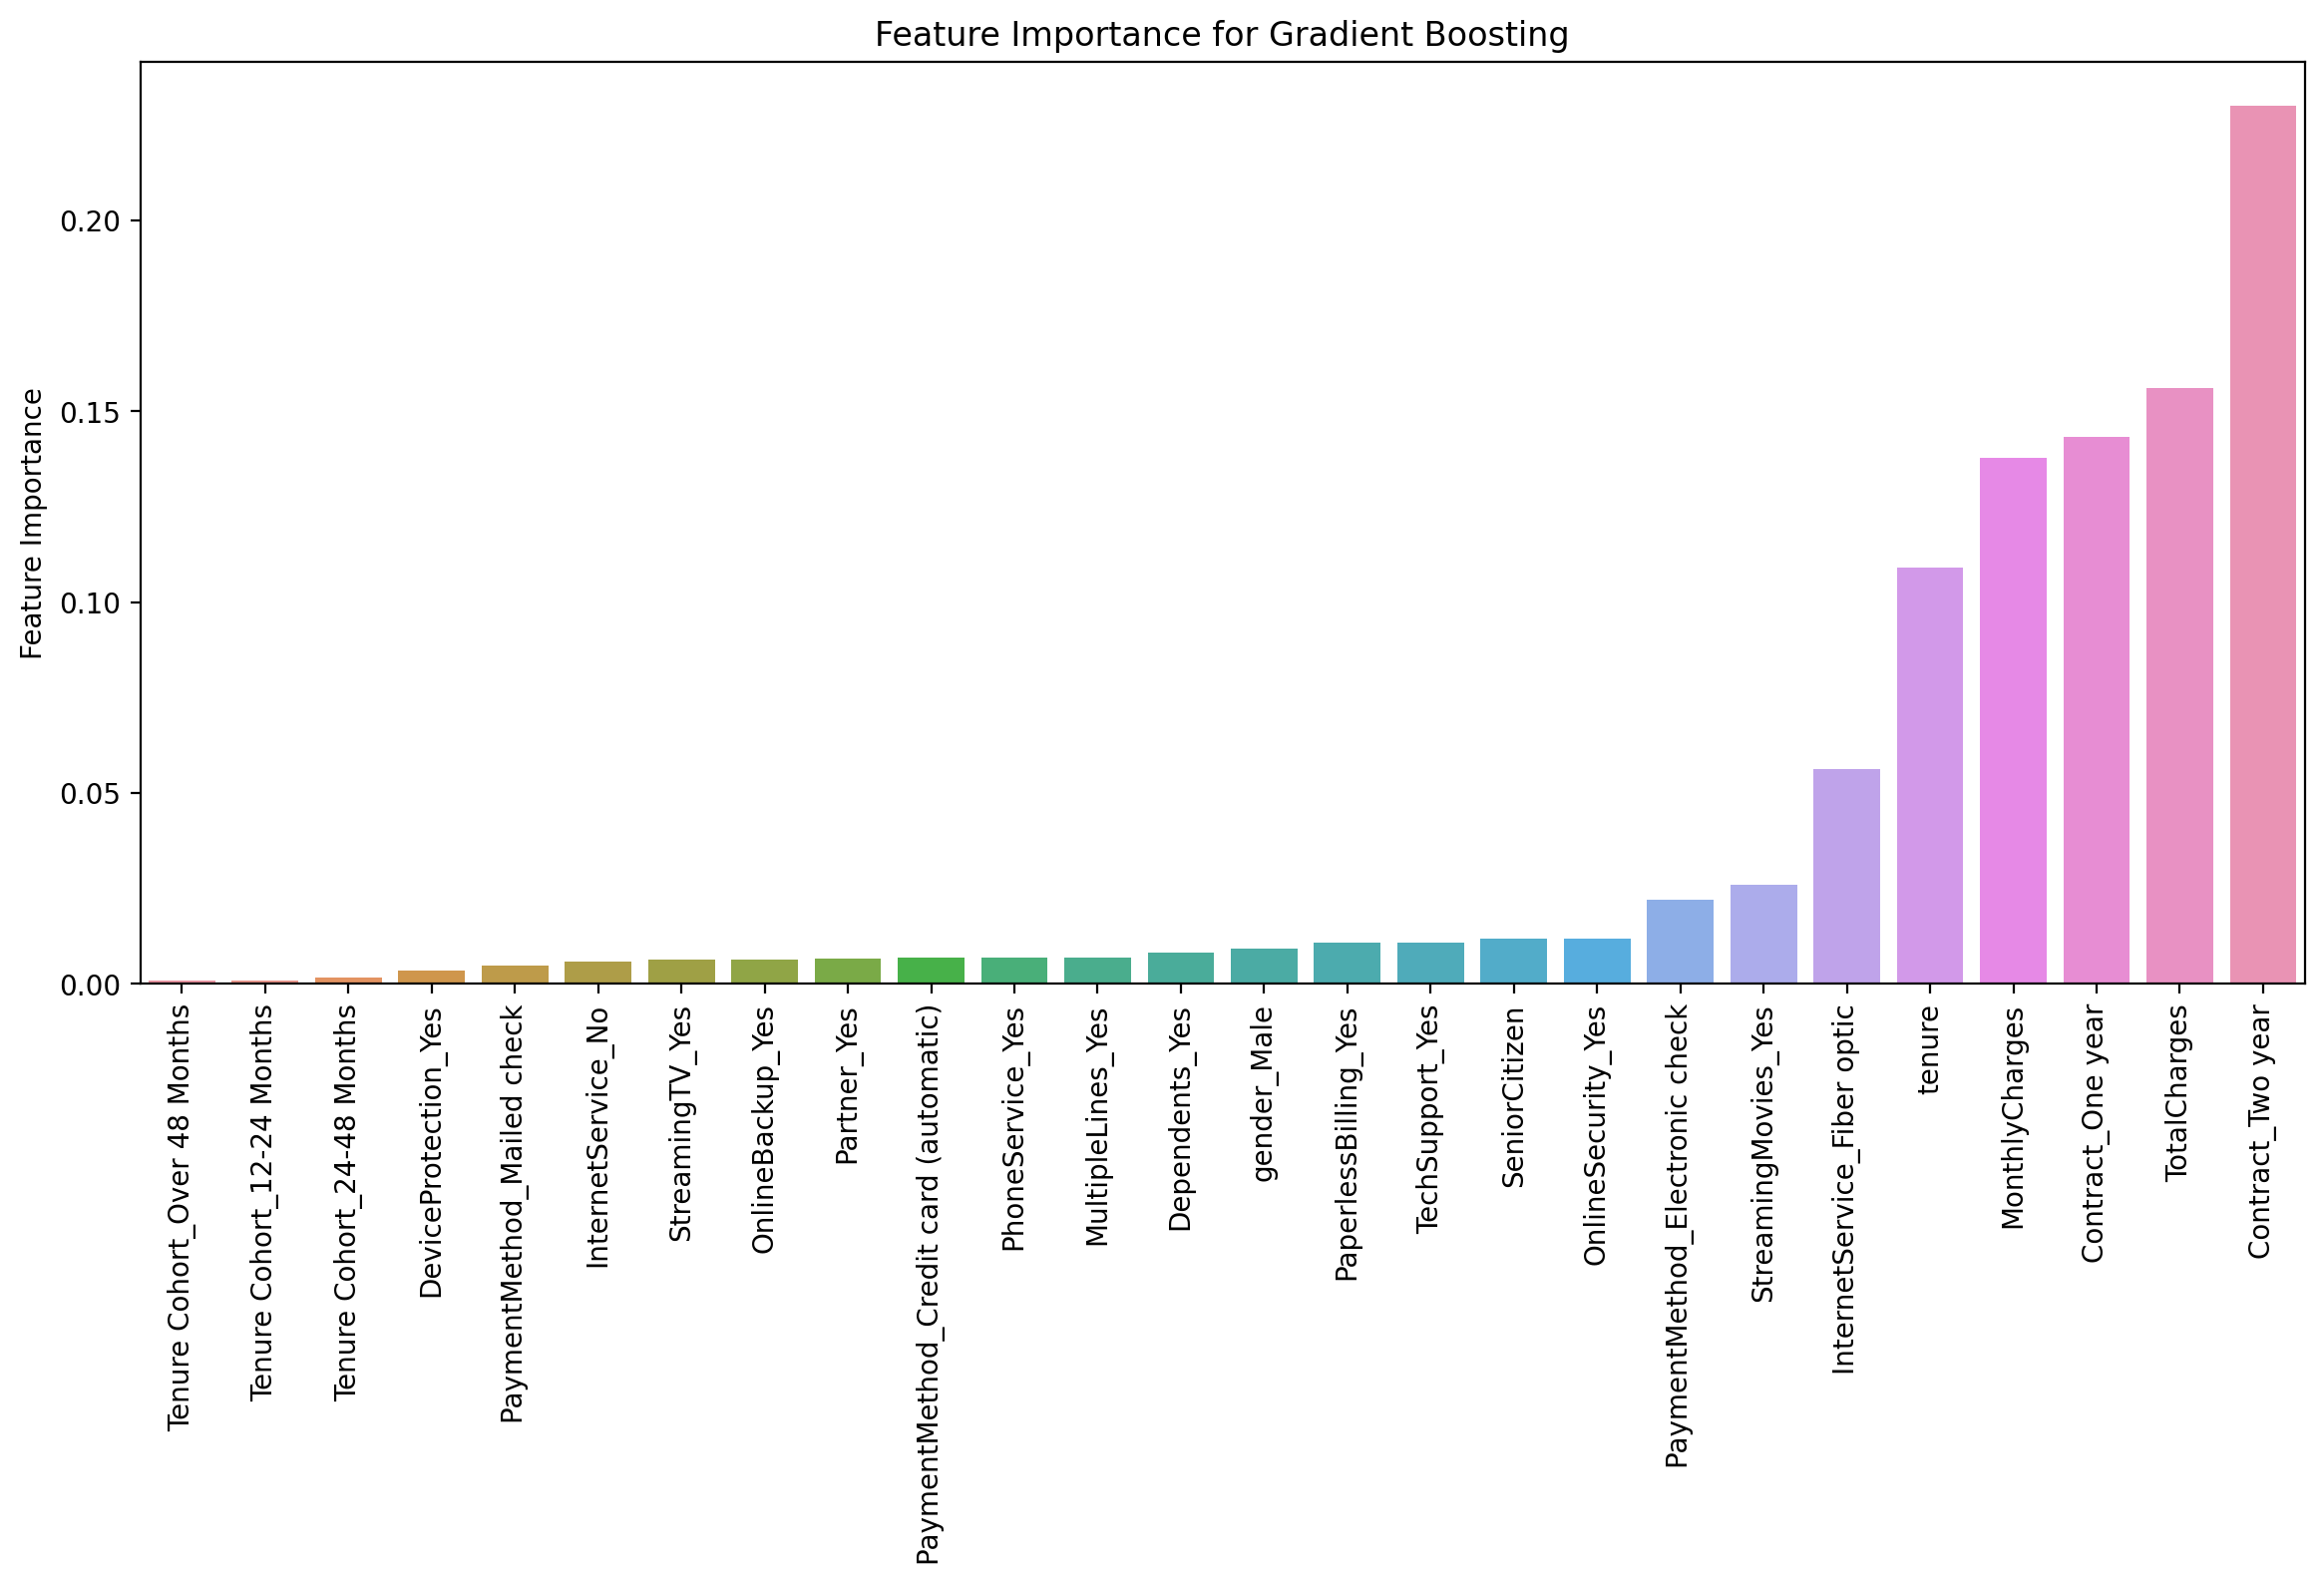

In [104]:
imp_feats_gb = pd.DataFrame(data=gradient_boost.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats_gb.sort_values('Feature Importance'),x=imp_feats_gb.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Gradient Boosting");

**For Gradient Boosting Classifier, the top 5 most important features are Contract Type, Total and Monthly Charges, Tenure, using Fiber optic.**

## Models Results

In [87]:
data = {'models': models,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_scores
        }

df_result_sum = pd.DataFrame(data)

In [99]:
df_result_sum.sort_values('f1_score', ascending=False)

models  accuracy  precision    recall  f1_score
6    Random Forest (OS+tuning)  0.910145   0.878623  0.949119  0.912512
8            Gradient Boosting  0.823188   0.785714  0.882583  0.831336
5    Decision Tree (OS+tuning)  0.757488   0.725694  0.818004  0.769089
7            Adaptive Boosting  0.758454   0.728546  0.814090  0.768946
4                     SVC (OS)  0.752657   0.728086  0.796477  0.760748
3  Logistic Regression (OS+CV)  0.742995   0.729831  0.761252  0.745211
0          Logistic Regression  0.794326   0.677419  0.525000  0.591549
2                Random Forest  0.757447   0.600000  0.435000  0.504348
1                Decision Tree  0.700709   0.471503  0.455000  0.463104

## Saving best models

In [115]:
dump(random_forest, 'rf_model.joblib')
dump(gradient_boost, 'gb_model.joblib')
dump(decision_tree, 'dt_model.joblib')
dump(ada_boost, 'ada_model.joblib')
dump(svc, 'svc_model.joblib')
dump(log_model, 'log_model.joblib')

['log_model.joblib']

## Overall Feature Importances over 3 best performing models

In [111]:
# Random Forest Importances
rf_importance = random_forest.feature_importances_
rf_names = random_forest.feature_names_in_

rf_import_df = pd.DataFrame({"feature_names" : rf_names, 
                               "rf_importances" : rf_importance.round(3)})
rf_import_df['rf_impt_rank'] = rf_import_df['rf_importances'].rank(method='dense', ascending=False)

# Gradient Boosting Importances
gb_importance = gradient_boost.feature_importances_
gb_names = gradient_boost.feature_names_in_

gb_import_df = pd.DataFrame({"feature_names" : gb_names, 
                               "gb_importances" : gb_importance.round(3)})
gb_import_df['gb_impt_rank'] = gb_import_df['gb_importances'].rank(method='dense', ascending=False)

# Decision Tree (OS+tuning) Importances
dt_importance = decision_tree.feature_importances_
dt_names = decision_tree.feature_names_in_

dt_import_df = pd.DataFrame({"feature_names" : dt_names, 
                               "dt_importances" : dt_importance.round(3)})
dt_import_df['dt_impt_rank'] = dt_import_df['dt_importances'].rank(method='dense', ascending=False)


# Combine all importance score
final_import1 = pd.merge(rf_import_df, gb_import_df, on='feature_names', how='inner')
final_import2 = pd.merge(final_import1, dt_import_df, on='feature_names', how='inner')

# Compute overall ranking
final_import2['score'] = final_import2['rf_impt_rank'] + final_import2['gb_impt_rank'] + final_import2['dt_impt_rank']
final_import2['overall_rank'] = final_import2['score'].rank(method='dense', ascending=True)
final_import2[['feature_names', 'rf_impt_rank', 'gb_impt_rank', 'dt_impt_rank','score', 'overall_rank']].sort_values(by = 'overall_rank', ascending=True)

feature_names  rf_impt_rank  gb_impt_rank  \
18                      Contract_Two year           4.0           1.0   
3                            TotalCharges           1.0           2.0   
1                                  tenure           3.0           5.0   
2                          MonthlyCharges           2.0           4.0   
17                      Contract_One year           8.0           3.0   
9             InternetService_Fiber optic           5.0           6.0   
21         PaymentMethod_Electronic check           6.0           8.0   
16                    StreamingMovies_Yes          14.0           7.0   
4                             gender_Male           7.0          11.0   
19                   PaperlessBilling_Yes           9.0          10.0   
11                     OnlineSecurity_Yes          11.0           9.0   
14                        TechSupport_Yes          11.0          10.0   
0                           SeniorCitizen          13.0           9.0   
5                             Partner_Yes          10.0          13.0   
6                          Dependents_Yes          13.0          12.0   
12                       OnlineBackup_Yes          12.0          14.0   
8                       MultipleLines_Yes          13.0          13.0   
25           Tenure Cohort_Over 48 Months          10.0          18.0   
10                     InternetService_No          15.0          14.0   
20  PaymentMethod_Credit card (automatic)          16.0          13.0   
15                        StreamingTV_Yes          15.0          14.0   
13                   DeviceProtection_Yes          14.0          16.0   
7                        PhoneService_Yes          20.0          13.0   
22             PaymentMethod_Mailed check          17.0          15.0   
24             Tenure Cohort_24-48 Months          18.0          17.0   
23             Tenure Cohort_12-24 Months          19.0          18.0   

    dt_impt_rank  score  overall_rank  
18           1.0    6.0           1.0  
3            7.0   10.0           2.0  
1            3.0   11.0           3.0  
2            5.0   11.0           3.0  
17           2.0   13.0           4.0  
9            4.0   15.0           5.0  
21           8.0   22.0           6.0  
16           6.0   27.0           7.0  
4           10.0   28.0           8.0  
19          10.0   29.0           9.0  
11          10.0   30.0          10.0  
14          10.0   31.0          11.0  
0           10.0   32.0          12.0  
5           10.0   33.0          13.0  
6           10.0   35.0          14.0  
12          10.0   36.0          15.0  
8           10.0   36.0          15.0  
25          10.0   38.0          16.0  
10          10.0   39.0          17.0  
20          10.0   39.0          17.0  
15          10.0   39.0          17.0  
13          10.0   40.0          18.0  
7            9.0   42.0          19.0  
22          10.0   42.0          19.0  
24          10.0   45.0          20.0  
23          10.0   47.0          21.0

# Conclusions

- **After performing oversampling all models improved**, especially on recall scores. This is due to our dataset being imbalanced.
- **Random Forest Classifier gives the most accurate predictions**, having a 91% f1-score. The Gradient Boosting Classsifer was also quite accurate with an 83% f1-score. Decision Tree and Adaptive Boosting have quite a similar f1-score of around 76%.
- **The top predictive features are Contract Type, Total Charges, Tenure, Monthly Charges, using Fiber optic, Payment Method and Streaming Movies.** This is based on the feature importance score across the 3 best performing models: Random Forest Classifier, Gradient Boosting Classsifer, and Decision Tree.